# **Pandas, Statistics, and Numerical Methods**

## **0. Introduction**

## **1. Pandas**

- **Pandas** is a package of **fast, efficient data analysis tools** for Python.
- Its popularity has surged in recent years, coincident with the rise of fields such as **data science and machine learning**.
- Here’s a popularity comparison over time against Matlab and STATA courtesy of Stack Overflow Trends

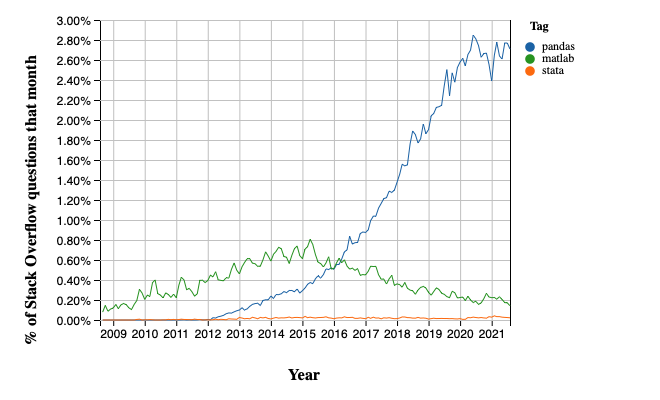

- Just as NumPy provides the basic array data type plus core array operations, pandas
    1. defines fundamental structures for working with data and
    2. endows them with methods that facilitate operations such as
        - **reading in data**
        - adjusting **indices**
        - working with dates and **time series**
        - sorting, grouping, re-ordering and general **data munging**
        - dealing with **missing values**, etc.
- More sophisticated statistical functionality is left to other packages, such as `statsmodels` and `scikit-learn`, which are built on top of pandas.
- This note will provide a basic introduction to pandas.
- Throughout the note, we will assume that the following imports have taken place

In [1016]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,8]  # Set default figure size
import requests

- Two important data types defined by pandas are `Series` and `DataFrame`.
- You can think of a `Series` as a “column” of data, such as a collection of observations on a single variable.
- A `DataFrame` is a two-dimensional object for storing related columns of data.

### 1.1. Series

- Let’s start with Series.
- We begin by creating a series of four random observations.

In [1017]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0    1.18
1   -1.15
2    1.02
3    0.25
Name: daily returns, dtype: float64

- Here you can imagine the indices `0, 1, 2, 3` as indexing four listed companies, and the values being daily returns on their shares (지분에 대한 일 수익률).
- Pandas `Series` are **built on top of NumPy arrays** and support **many similar operations**.

In [1018]:
s * 100

0    117.69
1   -114.84
2    101.87
3     24.60
Name: daily returns, dtype: float64

In [1019]:
np.abs(s)

0   1.18
1   1.15
2   1.02
3   0.25
Name: daily returns, dtype: float64

- But `Series` provide more than NumPy arrays.
- Not only do they have some additional (statistically oriented) methods

In [1020]:
s.describe() # 기초 통계량

count    4.00
mean     0.32
std      1.06
min     -1.15
25%     -0.10
50%      0.63
75%      1.06
max      1.18
Name: daily returns, dtype: float64

- But their **indices are more flexible**. (첨자가 숫자일 필요가 없다.)

In [1021]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG'] # Change the index of `s`
s

AMZN    1.18
AAPL   -1.15
MSFT    1.02
GOOG    0.25
Name: daily returns, dtype: float64

- Viewed in this way, `Series` are like fast, efficient Python dictionaries (with the restriction that the items in the dictionary all have the *same type*—in this case, floats).
- In fact, you can **use much of the same syntax as Python dictionaries**.

In [1022]:
s['AMZN']

1.1769293284476652

In [1023]:
s['AMZN'] = 0
s

AMZN    0.00
AAPL   -1.15
MSFT    1.02
GOOG    0.25
Name: daily returns, dtype: float64

In [1024]:
'AAPL' in s

True

### 1.2. DataFrame

- While a `Series` is a single column of data, a `DataFrame` is several columns, one for each variable.
- In essence, a `DataFrame` in pandas is analogous to a (highly optimized) Excel spreadsheet.
- Thus, it is a powerful tool for representing and analyzing data that are naturally organized into rows and columns, often with descriptive indexes for individual rows and individual columns.
- Let’s look at an example that reads data from the CSV file `pandas/data/test_pwt.csv`, which is taken from the [Penn World Tables](https://www.rug.nl/ggdc/productivity/pwt/pwt-releases/pwt-7.0).
- The dataset contains the following indicators.



<center>

|Variable Name|Description|
|-------------|------------|
|POP|Population (in thousands)|
|XRAT|Exchange Rate to US Dollar|
|tcgdp|Total PPP Converted GDP (in million international dollar)|
|cc|Consumption Share of PPP Converted GDP Per Capita (%)|
|cg|Government Consumption Share of PPP Converted GDP Per Capita (%)|

</center>

- We’ll read this in from a URL using the `pandas` function `read_csv`.

In [1025]:
df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

- Here’s the content of `test_pwt.csv`.

In [1026]:
df

,country,country isocode,year,...,tcgdp,cc,cg
0,Argentina,ARG,2000,...,"295,072.22",75.72,5.58
1,Australia,AUS,2000,...,"541,804.65",67.76,6.72
2,India,IND,2000,...,"1,728,144.37",64.58,14.07
3,Israel,ISR,2000,...,"129,253.89",64.44,10.27
4,Malawi,MWI,2000,...,"5,026.22",74.71,11.66
5,South Africa,ZAF,2000,...,"227,242.37",72.72,5.73
6,United States,USA,2000,...,"9,898,700.00",72.35,6.03
7,Uruguay,URY,2000,...,"25,255.96",78.98,5.11


#### 1.2.1. Select Data by Position

- In practice, one thing that we do all the time is to find, select and work with a subset of the data of our interests.
- We can select particular rows using standard Python array **slicing notation**.

In [1027]:
df[2:5]

,country,country isocode,year,...,tcgdp,cc,cg
2,India,IND,2000,...,"1,728,144.37",64.58,14.07
3,Israel,ISR,2000,...,"129,253.89",64.44,10.27
4,Malawi,MWI,2000,...,"5,026.22",74.71,11.66


- To select columns, we can pass a list containing the names of the desired columns represented as strings.

In [1028]:
df[['country', 'tcgdp']]

,country,tcgdp
0,Argentina,"295,072.22"
1,Australia,"541,804.65"
2,India,"1,728,144.37"
3,Israel,"129,253.89"
4,Malawi,"5,026.22"
5,South Africa,"227,242.37"
6,United States,"9,898,700.00"
7,Uruguay,"25,255.96"


- o select both rows and columns using integers, the `iloc` attribute should be used with the format `.iloc[rows, columns]`.


In [1029]:
df.iloc[2:5, 0:4]

,country,country isocode,year,POP
2,India,IND,2000,"1,006,300.30"
3,Israel,ISR,2000,"6,114.57"
4,Malawi,MWI,2000,"11,801.50"


- To select rows and columns using a mixture of integers and labels, the `loc` attribute can be used in a similar way.

In [1030]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,"1,728,144.37"
3,Israel,"129,253.89"
4,Malawi,"5,026.22"


#### 1.2.2. Select Data by Condition

- Instead of indexing rows and columns using integers and names, we can also obtain a sub-dataframe of our interests that satisfies certain (potentially complicated) conditions.
- This section demonstrates various ways to do that.
- The most straightforward way is with the `[]` operator.
- Note that we can use `df.columnn_name` instead of `df['column_name']`.

In [1031]:
df[df.POP >= 20000] # df 속 POP이 20000을 넘은 경우만을 출력한다.

,country,country isocode,year,...,tcgdp,cc,cg
0,Argentina,ARG,2000,...,"295,072.22",75.72,5.58
2,India,IND,2000,...,"1,728,144.37",64.58,14.07
5,South Africa,ZAF,2000,...,"227,242.37",72.72,5.73
6,United States,USA,2000,...,"9,898,700.00",72.35,6.03


- To understand what is going on here, notice that `df.POP >= 20000` returns a series of boolean values.

In [1032]:
df.POP >= 20000

0     True
1    False
2     True
3    False
4    False
5     True
6     True
7    False
Name: POP, dtype: bool

In this case, `df[___]` takes a series of boolean values and only returns rows with the `True` values.
- Take one more example,

In [1033]:
df[(df.country.isin(['Argentina', 'India', 'South Africa'])) & (df.POP > 40000)]

,country,country isocode,year,...,tcgdp,cc,cg
2,India,IND,2000,...,"1,728,144.37",64.58,14.07
5,South Africa,ZAF,2000,...,"227,242.37",72.72,5.73


- However, there is another way of doing the same thing, which can be slightly faster for large dataframes, with more natural syntax.

In [1034]:
# the above is equivalent to
df.query("POP >= 20000")

,country,country isocode,year,...,tcgdp,cc,cg
0,Argentina,ARG,2000,...,"295,072.22",75.72,5.58
2,India,IND,2000,...,"1,728,144.37",64.58,14.07
5,South Africa,ZAF,2000,...,"227,242.37",72.72,5.73
6,United States,USA,2000,...,"9,898,700.00",72.35,6.03


In [1035]:
df.query("country in ['Argentina', 'India', 'South Africa'] and POP > 40000")

,country,country isocode,year,...,tcgdp,cc,cg
2,India,IND,2000,...,"1,728,144.37",64.58,14.07
5,South Africa,ZAF,2000,...,"227,242.37",72.72,5.73


- We can also allow arithmetic operations between different columns.

In [1036]:
df[(df.cc + df.cg >= 80) & (df.POP <= 20000)]

,country,country isocode,year,...,tcgdp,cc,cg
4,Malawi,MWI,2000,...,"5,026.22",74.71,11.66
7,Uruguay,URY,2000,...,"25,255.96",78.98,5.11


In [1037]:
# the above is equivalent to
df.query("cc + cg >= 80 & POP <= 20000")

,country,country isocode,year,...,tcgdp,cc,cg
4,Malawi,MWI,2000,...,"5,026.22",74.71,11.66
7,Uruguay,URY,2000,...,"25,255.96",78.98,5.11


- For example, we can use the conditioning to select the country with the largest household consumption - gdp share `cc`.

In [1038]:
df.loc[df.cc == max(df.cc)]

,country,country isocode,year,...,tcgdp,cc,cg
7,Uruguay,URY,2000,...,"25,255.96",78.98,5.11


- When we only want to **look at certain columns of a selected sub-dataframe**, we can use the above conditions with the `.loc[__ , __]` command.
- The first argument takes the condition, while the second argument takes a list of columns we want to return.

In [1039]:
df.loc[(df.cc + df.cg >= 80) & (df.POP <= 20000), ['country', 'year', 'POP']]

,country,year,POP
4,Malawi,2000,"11,801.50"
7,Uruguay,2000,"3,219.79"


##### 1.2.2.1.Application: Subsetting DataFrame

- Real-world datasets can be [enormous](https://developers.google.com/machine-learning/data-prep/construct/collect/data-size-quality?hl=ko).
- It is sometimes desirable to work with a subset of data to enhance computational efficiency and reduce redundancy.
- Let’s imagine that we’re only interested in the population (`POP`) and total GDP (`tcgdp`).
- One way to strip the data frame `df` down to only these variables is to overwrite the dataframe using the selection method described above

In [1040]:
df_subset = df[['country', 'POP', 'tcgdp']]
df_subset

,country,POP,tcgdp
0,Argentina,"37,335.65","295,072.22"
1,Australia,"19,053.19","541,804.65"
2,India,"1,006,300.30","1,728,144.37"
3,Israel,"6,114.57","129,253.89"
4,Malawi,"11,801.50","5,026.22"
5,South Africa,"45,064.10","227,242.37"
6,United States,"282,171.96","9,898,700.00"
7,Uruguay,"3,219.79","25,255.96"


- We can then save the smaller dataset for further analysis.

In [1041]:
df_subset.to_csv('pwt_subset.csv', index=False)

#### 1.2.3. Apply Method

- Another widely used Pandas method is `df.apply()`.
- It **applies a function to each row/column and returns a series**.
- This function can be some built-in functions like the `max` function, a [`lambda`](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter03.04-Lambda-Functions.html) function, or a user-defined function.
- Here is an example using the `max` function

In [1042]:
df[['year', 'POP', 'XRAT', 'tcgdp', 'cc', 'cg']].apply(max)

year        2,000.00
POP     1,006,300.30
XRAT           59.54
tcgdp   9,898,700.00
cc             78.98
cg             14.07
dtype: float64

- This line of code applies the `max` function to all selected columns.
- `lambda` function is often used with `df.apply()` method
- A trivial example is to return itself for each row in the dataframe

In [1043]:
df.apply(lambda row: row, axis=1)

,country,country isocode,year,...,tcgdp,cc,cg
0,Argentina,ARG,2000,...,"295,072.22",75.72,5.58
1,Australia,AUS,2000,...,"541,804.65",67.76,6.72
2,India,IND,2000,...,"1,728,144.37",64.58,14.07
3,Israel,ISR,2000,...,"129,253.89",64.44,10.27
4,Malawi,MWI,2000,...,"5,026.22",74.71,11.66
5,South Africa,ZAF,2000,...,"227,242.37",72.72,5.73
6,United States,USA,2000,...,"9,898,700.00",72.35,6.03
7,Uruguay,URY,2000,...,"25,255.96",78.98,5.11


- For the `.apply()` method
    - `axis = 0` – apply function to each column (variables)
    - `axis = 1` – apply function to each row (observations)
    - `axis = 0` is the default parameter

- We can use it together with `.loc[]` to do some more advanced selection.

In [1044]:
complexCondition = df.apply(
    lambda row: row.POP > 40000 if row.country in ['Argentina', 'India', 'South Africa'] else row.POP < 20000,
    axis=1), ['country', 'year', 'POP', 'XRAT', 'tcgdp']

- `df.apply()` here returns a series of boolean values rows that satisfies the condition specified in the if-else statement.
- In addition, it also defines a subset of variables of interest.

In [1045]:
complexCondition

(0    False
 1     True
 2     True
 3     True
 4     True
 5     True
 6    False
 7     True
 dtype: bool,
 ['country', 'year', 'POP', 'XRAT', 'tcgdp'])

- When we apply this condition to the dataframe, the result will be:

In [1046]:
df.loc[complexCondition]

,country,year,POP,XRAT,tcgdp
1,Australia,2000,"19,053.19",1.72,"541,804.65"
2,India,2000,"1,006,300.30",44.94,"1,728,144.37"
3,Israel,2000,"6,114.57",4.08,"129,253.89"
4,Malawi,2000,"11,801.50",59.54,"5,026.22"
5,South Africa,2000,"45,064.10",6.94,"227,242.37"
7,Uruguay,2000,"3,219.79",12.10,"25,255.96"


#### 1.2.4. Make Changes in DataFrames

- The ability to make changes in dataframes is important to generate a clean dataset for future analysis.

1. We can use `df.where()` conveniently **to “keep” the rows we have selected and replace the rest rows with any other values**.

In [1047]:
df.where(df.POP >= 20000, False)

,country,country isocode,year,...,tcgdp,cc,cg
0,Argentina,ARG,2000,...,"295,072.22",75.72,5.58
1,False,False,False,...,False,False,False
2,India,IND,2000,...,"1,728,144.37",64.58,14.07
3,False,False,False,...,False,False,False
4,False,False,False,...,False,False,False
5,South Africa,ZAF,2000,...,"227,242.37",72.72,5.73
6,United States,USA,2000,...,"9,898,700.00",72.35,6.03
7,False,False,False,...,False,False,False


2. We can simply use `.loc[]` to **specify the column that we want to modify, and assign values**.

In [1048]:
df.loc[df.cg == max(df.cg), 'cg'] = np.nan
df

,country,country isocode,year,...,tcgdp,cc,cg
0,Argentina,ARG,2000,...,"295,072.22",75.72,5.58
1,Australia,AUS,2000,...,"541,804.65",67.76,6.72
2,India,IND,2000,...,"1,728,144.37",64.58,NaN
3,Israel,ISR,2000,...,"129,253.89",64.44,10.27
4,Malawi,MWI,2000,...,"5,026.22",74.71,11.66
5,South Africa,ZAF,2000,...,"227,242.37",72.72,5.73
6,United States,USA,2000,...,"9,898,700.00",72.35,6.03
7,Uruguay,URY,2000,...,"25,255.96",78.98,5.11


3. We can use the `.apply()` method **to modify rows/columns as a whole**.

In [1049]:
def update_row(row):
    # modify POP
    row.POP = np.nan if row.POP<= 10000 else row.POP

    # modify XRAT
    row.XRAT = row.XRAT / 10
    return row

df.apply(update_row, axis=1)

,country,country isocode,year,...,tcgdp,cc,cg
0,Argentina,ARG,2000,...,"295,072.22",75.72,5.58
1,Australia,AUS,2000,...,"541,804.65",67.76,6.72
2,India,IND,2000,...,"1,728,144.37",64.58,NaN
3,Israel,ISR,2000,...,"129,253.89",64.44,10.27
4,Malawi,MWI,2000,...,"5,026.22",74.71,11.66
5,South Africa,ZAF,2000,...,"227,242.37",72.72,5.73
6,United States,USA,2000,...,"9,898,700.00",72.35,6.03
7,Uruguay,URY,2000,...,"25,255.96",78.98,5.11


4. We can use the `.applymap()` method to modify all individual entries in the dataframe altogether.

In [1050]:
# Round all decimal numbers to 2 decimal places
df.applymap(lambda x : round(x,2) if type(x)!=str else x)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15188\2333807478.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x : round(x,2) if type(x)!=str else x)


,country,country isocode,year,...,tcgdp,cc,cg
0,Argentina,ARG,2000,...,"295,072.22",75.72,5.58
1,Australia,AUS,2000,...,"541,804.65",67.76,6.72
2,India,IND,2000,...,"1,728,144.37",64.58,NaN
3,Israel,ISR,2000,...,"129,253.89",64.44,10.27
4,Malawi,MWI,2000,...,"5,026.22",74.71,11.66
5,South Africa,ZAF,2000,...,"227,242.37",72.72,5.73
6,United States,USA,2000,...,"9,898,700.00",72.35,6.03
7,Uruguay,URY,2000,...,"25,255.96",78.98,5.11


##### 1.2.4.1. Application: Missing Value Imputation

- Replacing missing values is an important step in **data munging**.
- Let’s randomly insert some NaN values

In [1051]:
for idx in list(zip([0, 3, 5, 6], [3, 4, 6, 2])):
    df.iloc[idx] = np.nan

df

,country,country isocode,year,...,tcgdp,cc,cg
0,Argentina,ARG,"2,000.00",...,"295,072.22",75.72,5.58
1,Australia,AUS,"2,000.00",...,"541,804.65",67.76,6.72
2,India,IND,"2,000.00",...,"1,728,144.37",64.58,NaN
3,Israel,ISR,"2,000.00",...,"129,253.89",64.44,10.27
4,Malawi,MWI,"2,000.00",...,"5,026.22",74.71,11.66
5,South Africa,ZAF,"2,000.00",...,"227,242.37",NaN,5.73
6,United States,USA,NaN,...,"9,898,700.00",72.35,6.03
7,Uruguay,URY,"2,000.00",...,"25,255.96",78.98,5.11


- The `zip()` function here creates pairs of values from the two lists (i.e. `[0,3]`, `[3,4]` ⋯)
- We can use the `.applymap()` method again to replace all missing values with 0

In [1052]:
# replace all NaN values by 0
def replace_nan(x):
    if type(x)!=str:
        return  0 if np.isnan(x) else x
    else:
        return x

df.applymap(replace_nan)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15188\966822939.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(replace_nan)


,country,country isocode,year,...,tcgdp,cc,cg
0,Argentina,ARG,"2,000.00",...,"295,072.22",75.72,5.58
1,Australia,AUS,"2,000.00",...,"541,804.65",67.76,6.72
2,India,IND,"2,000.00",...,"1,728,144.37",64.58,0.00
3,Israel,ISR,"2,000.00",...,"129,253.89",64.44,10.27
4,Malawi,MWI,"2,000.00",...,"5,026.22",74.71,11.66
5,South Africa,ZAF,"2,000.00",...,"227,242.37",0.00,5.73
6,United States,USA,0.00,...,"9,898,700.00",72.35,6.03
7,Uruguay,URY,"2,000.00",...,"25,255.96",78.98,5.11


- Pandas also provides us with convenient methods to replace missing values.
    - For example, single imputation using variable means can be easily done in pandas

In [1053]:
df = df.fillna(df.iloc[:,2:8].mean())
df

,country,country isocode,year,...,tcgdp,cc,cg
0,Argentina,ARG,"2,000.00",...,"295,072.22",75.72,5.58
1,Australia,AUS,"2,000.00",...,"541,804.65",67.76,6.72
2,India,IND,"2,000.00",...,"1,728,144.37",64.58,7.30
3,Israel,ISR,"2,000.00",...,"129,253.89",64.44,10.27
4,Malawi,MWI,"2,000.00",...,"5,026.22",74.71,11.66
5,South Africa,ZAF,"2,000.00",...,"227,242.37",71.22,5.73
6,United States,USA,"2,000.00",...,"9,898,700.00",72.35,6.03
7,Uruguay,URY,"2,000.00",...,"25,255.96",78.98,5.11


- Missing value imputation is a big area in data science involving various machine learning techniques.
- There are also more [advanced tools](https://scikit-learn.org/stable/modules/impute.html) in python to impute missing values.

#### 1.2.5. Standardization and Visualization

- Let’s imagine that we’re only interested in the population (`POP`) and total GDP (`tcgdp`).
- One way to strip the data frame `df` down to only these variables is to overwrite the dataframe using the selection method described above

In [1054]:
df = df[['country', 'POP', 'tcgdp']]
df

,country,POP,tcgdp
0,Argentina,"196,246.49","295,072.22"
1,Australia,"19,053.19","541,804.65"
2,India,"1,006,300.30","1,728,144.37"
3,Israel,"6,114.57","129,253.89"
4,Malawi,"11,801.50","5,026.22"
5,South Africa,"45,064.10","227,242.37"
6,United States,"282,171.96","9,898,700.00"
7,Uruguay,"3,219.79","25,255.96"


- Here the index `0, 1,..., 7` is redundant because we can use the country names as an index.
- To do this, we set the index to be the `country` variable in the dataframe.

In [1055]:
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,"196,246.49","295,072.22"
Australia,"19,053.19","541,804.65"
India,"1,006,300.30","1,728,144.37"
Israel,"6,114.57","129,253.89"
Malawi,"11,801.50","5,026.22"
South Africa,"45,064.10","227,242.37"
United States,"282,171.96","9,898,700.00"
Uruguay,"3,219.79","25,255.96"


- Let’s give the columns slightly better names

In [1056]:
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,"196,246.49","295,072.22"
Australia,"19,053.19","541,804.65"
India,"1,006,300.30","1,728,144.37"
Israel,"6,114.57","129,253.89"
Malawi,"11,801.50","5,026.22"
South Africa,"45,064.10","227,242.37"
United States,"282,171.96","9,898,700.00"
Uruguay,"3,219.79","25,255.96"


- The `population` variable is in thousands, let’s revert to single units

In [1057]:
df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,"196,246,486.57","295,072.22"
Australia,"19,053,186.00","541,804.65"
India,"1,006,300,297.00","1,728,144.37"
Israel,"6,114,570.00","129,253.89"
Malawi,"11,801,505.00","5,026.22"
South Africa,"45,064,098.00","227,242.37"
United States,"282,171,957.00","9,898,700.00"
Uruguay,"3,219,793.00","25,255.96"


- Next, we’re going to add a column showing real GDP per capita, multiplying by 1,000,000 as we go because total GDP is in millions

In [1058]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

,population,total GDP,GDP percap
country,,,
Argentina,"196,246,486.57","295,072.22","1,503.58"
Australia,"19,053,186.00","541,804.65","28,436.43"
India,"1,006,300,297.00","1,728,144.37","1,717.32"
Israel,"6,114,570.00","129,253.89","21,138.67"
Malawi,"11,801,505.00","5,026.22",425.90
South Africa,"45,064,098.00","227,242.37","5,042.65"
United States,"282,171,957.00","9,898,700.00","35,080.38"
Uruguay,"3,219,793.00","25,255.96","7,843.97"


- One of the nice things about pandas `DataFrame` and `Series` objects is that they have methods for plotting and visualization that work through Matplotlib.
    - For example, we can easily generate a bar plot of GDP per capita

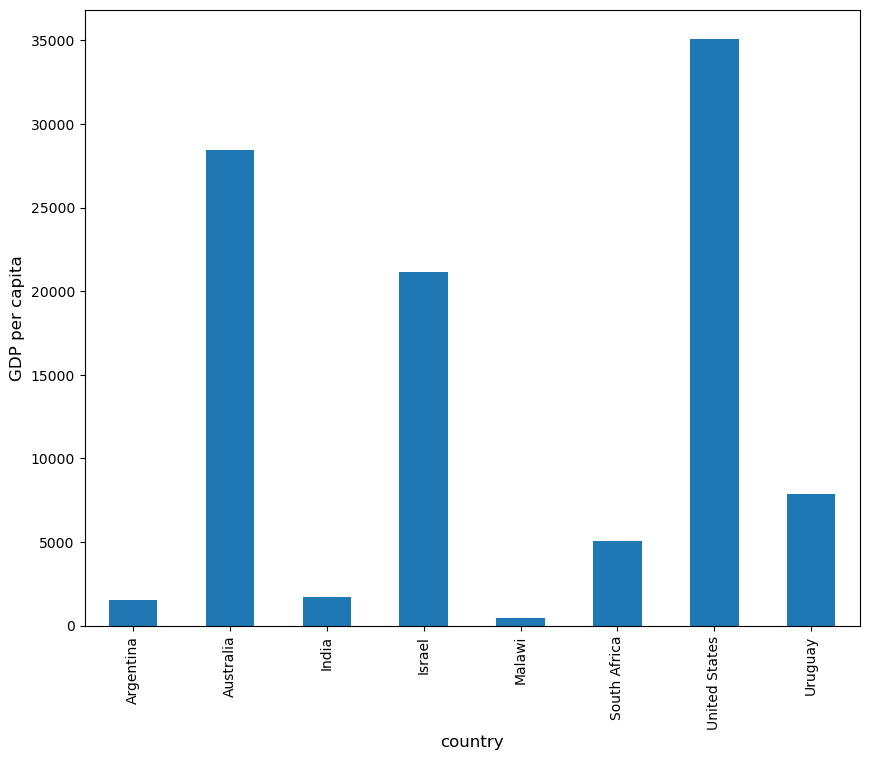

In [1059]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

- At the moment the data frame is ordered alphabetically on the countries—let’s change it to GDP per capita

In [1060]:
df = df.sort_values(by='GDP percap', ascending=False)
df

,population,total GDP,GDP percap
country,,,
United States,"282,171,957.00","9,898,700.00","35,080.38"
Australia,"19,053,186.00","541,804.65","28,436.43"
Israel,"6,114,570.00","129,253.89","21,138.67"
Uruguay,"3,219,793.00","25,255.96","7,843.97"
South Africa,"45,064,098.00","227,242.37","5,042.65"
India,"1,006,300,297.00","1,728,144.37","1,717.32"
Argentina,"196,246,486.57","295,072.22","1,503.58"
Malawi,"11,801,505.00","5,026.22",425.90


- Plotting as before now yields

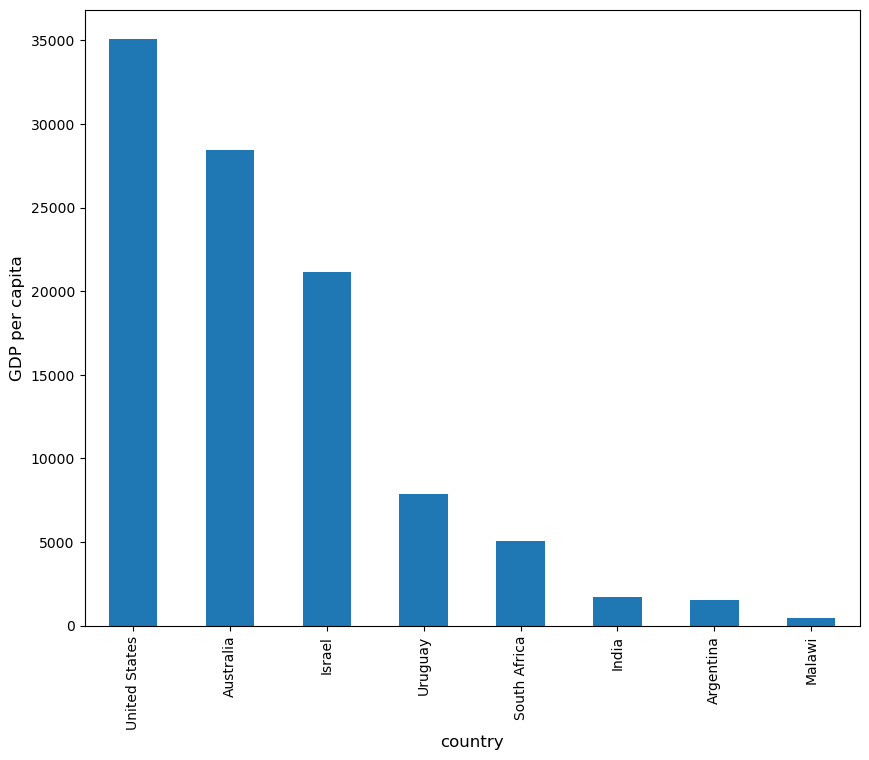

In [1061]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

### 1.3. Online Data Sources

- Python makes it straightforward to query online databases programmatically.
- An important database for economists is [FRED](https://fred.stlouisfed.org/) — a vast collection of time series data maintained by the St. Louis Fed.
    - For example, suppose that we are interested in the [unemployment rat](https://fred.stlouisfed.org/series/UNRATE).
- Via FRED, the entire series for the US civilian unemployment rate can be downloaded directly by entering this URL into your browser (note that this requires an internet connection)

```
https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv
```

- This request returns a CSV file, which will be handled by your default application for this class of files.
- Alternatively, we can access the CSV file from within a Python program.
- This can be done with a variety of methods.
- We start with a relatively low-level method and then return to pandas.

#### 1.3.1. Accessin Data with `requests`

- One option is to use [requests](https://requests.readthedocs.io/en/latest/), a standard Python library for requesting data over the Internet.
- To begin, try the following code on your computer

In [1062]:
r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')

- If there’s no error message, then the call has succeeded.
- If you do get an error, then there are two likely causes
    1. You are not connected to the Internet — hopefully, this isn’t the case.
    2. Your machine is accessing the Internet through a proxy server, and Python isn’t aware of this.
- In the second case, you can either
    - switch to another machine
    - solve your proxy problem by reading the documentation
- Assuming that all is working, you can now proceed to use the `source` object returned by the call `requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')`

In [1063]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")
source[0]

'<!DOCTYPE html>\r'

In [1064]:
source[1]

'<html lang="en">\r'

In [1065]:
source[2]

'<head>\r'

- We could now write some additional code to parse this text and store it as an array.
- But this is unnecessary — pandas’ `read_csv` function can handle the task for us.
- We use `parse_dates=True` so that pandas recognizes our dates column, allowing for simple date filtering

In [1066]:
import requests
import pandas as pd
from io import StringIO

# Updated FRED CSV URL (no API key needed)
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE"

# 1) Accessing data with requests (low-level)
r = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
r.raise_for_status()

source = r.text.splitlines()
source[0]   # header line
source[1]   # first data row
source[2]   # second data row


'1948-02-01,3.8'

In [1067]:
data = pd.read_csv(StringIO(r.text), index_col=0, parse_dates=True)
data.index.name = "DATE"

# Si quieres que se vea como en el apunte (VALUE) en vez de UNRATE:
data = data.rename(columns={"UNRATE": "VALUE"})

data.describe()
data.index.min(), data.index.max(), data.shape



(Timestamp('1948-01-01 00:00:00'), Timestamp('2025-11-01 00:00:00'), (935, 1))

- The data has been read into a pandas DataFrame called data that we can now manipulate in the usual way

In [1068]:
type(data)

pandas.core.frame.DataFrame

In [1069]:
data.head()  # A useful method to get a quick look at a data frame

,VALUE
DATE,
1948-01-01,3.40
1948-02-01,3.80
1948-03-01,4.00
1948-04-01,3.90
1948-05-01,3.50


In [1070]:
pd.set_option('display.precision', 1)
data.describe()  # Your output might differ slightly

,VALUE
count,934.00
mean,5.67
std,1.71
min,2.50
25%,4.30
50%,5.50
75%,6.70
max,14.80


- We can also plot the unemployment rate from 2006 to 2012 as follows

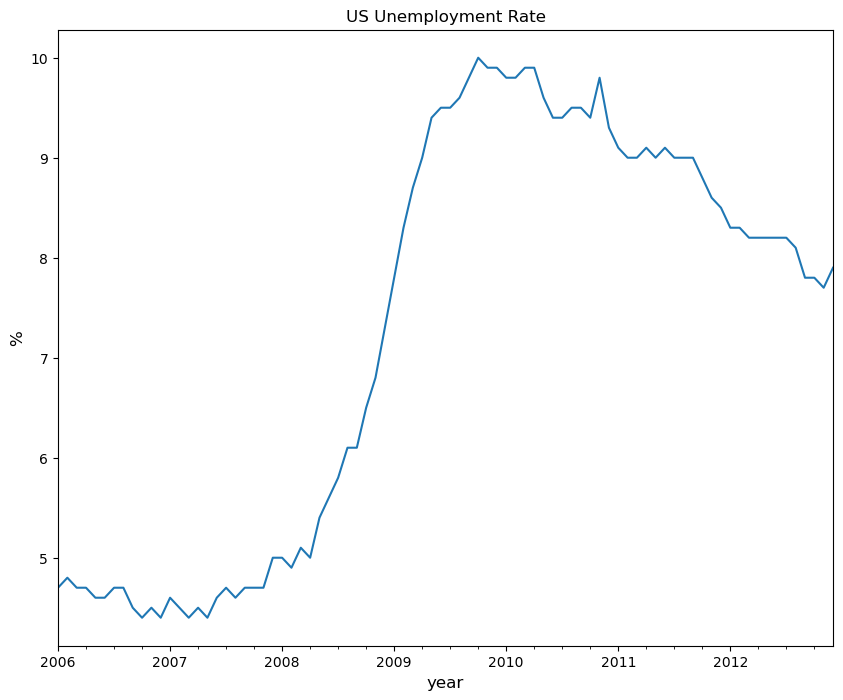

In [1071]:
ax = data['2006':'2012'].plot(title='US Unemployment Rate', legend=False)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

- Note that pandas offers many other file type alternatives.
- Pandas has a [wide variety](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) of top-level methods that we can use to read, excel, json, parquet or plug straight into a database server.

#### 1.3.2. Using `pandas_datareade` and `yfinance` to Access Data

- The maker of pandas has also authored a library called [pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/) that gives programmatic access to many data sources straight from the Jupyter notebook.
- While some sources require an access key, many of the most important (e.g., FRED, [OECD](https://data.oecd.org/), [EUROSTAT](https://ec.europa.eu/eurostat/data/database) and the World Bank) are free to use.
    - There are also other [python libraries](https://data.worldbank.org/products/third-party-apps) available for working with world bank data such as [`wbgapi`](https://pypi.org/project/wbgapi/)
- We will also use [yfinance](https://pypi.org/project/yfinance/) to fetch data from Yahoo finance in the exercises.
- For now let’s work through one example of downloading and plotting data — this time from the World Bank.

- The World Bank [collects and organizes](https://data.worldbank.org/indicator) data on a huge range of indicators.
    - For example, [here’s](https://data.worldbank.org/indicator/GC.DOD.TOTL.GD.ZS) some data on government debt as a ratio to GDP.
- The next code example fetches the data for you and plots time series for the US and Australia.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15188\3966480413.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  govt_debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country=['US', 'AU'], start=2005, end=2016).stack().unstack(0)


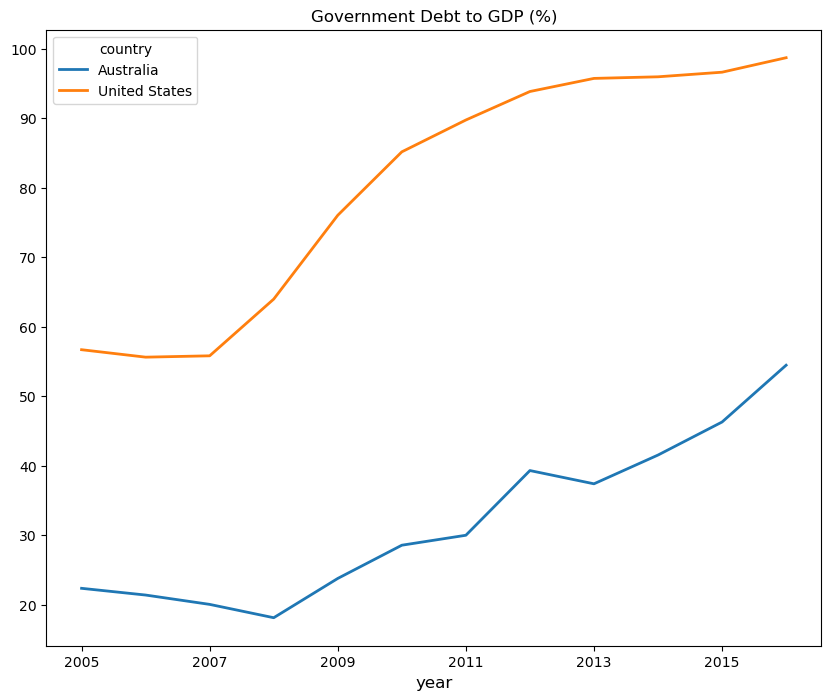

In [1072]:
from pandas_datareader import wb

govt_debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country=['US', 'AU'], start=2005, end=2016).stack().unstack(0)
ind = govt_debt.index.droplevel(-1)
govt_debt.index = ind
ax = govt_debt.plot(lw=2)
ax.set_xlabel('year', fontsize=12)
plt.title("Government Debt to GDP (%)")
plt.show()

- The [documentation](https://pandas-datareader.readthedocs.io/en/latest/index.html) provides more details on how to access various data sources.

**[Exercise]**

- With these imports:

```python
import datetime as dt
import yfinance as yf
```

- Write a program to calculate the percentage price change over 2021 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'C': 'Citigroup',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google'}
```

- Here’s the first part of the program

```python
def read_data(ticker_list,
          start=dt.datetime(2021, 1, 1),
          end=dt.datetime(2021, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        stock = yf.Ticker(tick)
        prices = stock.history(start=start, end=end)

        # Change the index to date-only
        prices.index = pd.to_datetime(prices.index.date)
        
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

- Complete the program to plot the result as a bar graph like this one:

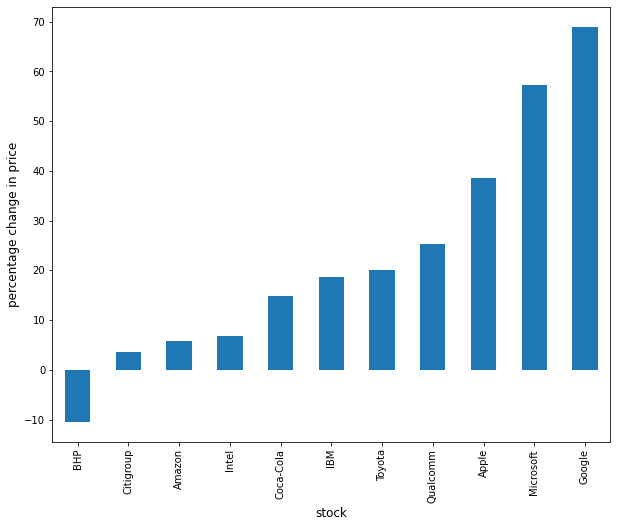

**[Exercise]**

- Using the method `read_data` introduced in Exercise above, write a program to obtain year-on-year percentage change for the following indices:

```python
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

-Complete the program to show summary statistics and plot the result as a time series graph like this one:

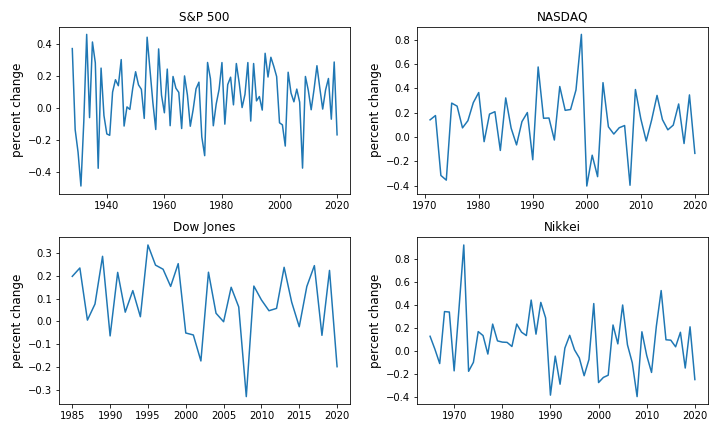

### 1.4. Pandas for Panel Data

- In an earlier note on pandas, we looked at working with simple data sets.
- Econometricians often need to work with more complex data sets, such as panels.
- Common tasks include
    - Importing data, cleaning it and reshaping it across several axes.
    - Selecting a time series or cross-section from a panel.
    - Grouping and summarizing data.
- `pandas` (derived from ‘panel’ and ‘data’) contains powerful and easy-to-use tools for solving exactly these kinds of problems.
- In what follows, we will use a panel data set of real minimum wages from the OECD to create:
    - summary statistics over multiple dimensions of our data
    - a time series of the average minimum wage of countries in the dataset
    - kernel density estimates of wages by continent
- We will begin by reading in our long format panel data from a CSV file and reshaping the resulting `DataFrame` with `pivot_table` to build a `MultiIndex`.
- Additional detail will be added to our `DataFrame` using pandas’ `merge` function, and data will be summarized with the `groupby` function.

#### 1.4.1. Slicing and Reshaping Data

- We will read in a dataset from the OECD of real minimum wages in 32 countries and assign it to `realwage`.
- The dataset can be accessed with the following link:

In [1073]:
url1 = 'https://raw.githubusercontent.com/QuantEcon/lecture-python/master/source/_static/lecture_specific/pandas_panel/realwage.csv'

In [1074]:
import pandas as pd

# Display 6 columns for viewing purposes
pd.set_option('display.max_columns', 6)

# Reduce decimal points to 2
pd.options.display.float_format = '{:,.2f}'.format

realwage = pd.read_csv(url1)

- Let’s have a look at what we’ve got to work with

In [1075]:
realwage.head()  # Show first 5 rows

,Unnamed: 0,Time,Country,Series,Pay period,value
0,0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,132.44"
1,1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,100.92"
2,2,2008-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,747.41"
3,3,2009-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,580.14"
4,4,2010-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,755.83"


- The data is currently in long format, which is difficult to analyze when there are several dimensions to the data.
- We will use `pivot_table` to create a wide format panel, with a `MultiIndex` to handle higher dimensional data.
- `pivot_table` arguments should specify the data (values), the index, and the columns we want in our resulting dataframe.
- By passing a list in columns, we can create a `MultiIndex` in our column axis

In [1076]:
realwage = realwage.pivot_table(values='value',
                                index='Time',
                                columns=['Country', 'Series', 'Pay period'])
realwage.head()

Country                                   Australia         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                20,410.65  10.33   
2007-01-01                                21,087.57  10.67   
2008-01-01                                20,718.24  10.48   
2009-01-01                                20,984.77  10.62   
2010-01-01                                20,879.33  10.57   

Country                                                        ...  \
Series     In 2015 constant prices at 2015 USD exchange rates  ...   
Pay period                                             Annual  ...   
Time                                                           ...   
2006-01-01                                          23,826.64  ...   
2007-01-01                                          24,616.84  ...   
2008-01-01                                          24,185.70  ...   
2009-01-01                                          24,496.84  ...   
2010-01-01                                          24,373.76  ...   

Country                               United States  \
Series     In 2015 constant prices at 2015 USD PPPs   
Pay period                                   Hourly   
Time                                                  
2006-01-01                                     6.05   
2007-01-01                                     6.24   
2008-01-01                                     6.78   
2009-01-01                                     7.58   
2010-01-01                                     7.88   

Country                                                               
Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88  

[5 rows x 128 columns]

- To more easily filter our time series data, later on, we will convert the index into a `DateTimeIndex`.

In [1077]:
realwage.index = pd.to_datetime(realwage.index)
type(realwage.index)

pandas.core.indexes.datetimes.DatetimeIndex

- The columns contain multiple levels of indexing, known as a `MultiIndex`, with levels being ordered hierarchically (Country > Series > Pay period).
- A `MultiIndex` is the simplest and most flexible way to manage panel data in pandas

In [1078]:
type(realwage.columns)

pandas.core.indexes.multi.MultiIndex

In [1079]:
realwage.columns.names

FrozenList(['Country', 'Series', 'Pay period'])

- Like before, we can select the country (the top level of our `MultiIndex`)

In [1080]:
realwage['United States'].head()

Series     In 2015 constant prices at 2015 USD PPPs         \
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                12,594.40   6.05   
2007-01-01                                12,974.40   6.24   
2008-01-01                                14,097.56   6.78   
2009-01-01                                15,756.42   7.58   
2010-01-01                                16,391.31   7.88   

Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88

- Stacking and unstacking levels of the `MultiIndex` will be used throughout this lecture to reshape our dataframe into a format we need.
- `.stack()` rotates the lowest level of the column `MultiIndex` to the row index (`.unstack()` works in the opposite direction - try it out)

In [1081]:
realwage.stack().head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15188\743219372.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  realwage.stack().head()


Country                                              Australia  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    20,410.65   
           Hourly                                        10.33   
2007-01-01 Annual                                    21,087.57   
           Hourly                                        10.67   
2008-01-01 Annual                                    20,718.24   

Country                                                                   \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              23,826.64   
           Hourly                                                  12.06   
2007-01-01 Annual                                              24,616.84   
           Hourly                                                  12.46   
2008-01-01 Annual                                              24,185.70   

Country                                                Belgium  ...  \
Series                In 2015 constant prices at 2015 USD PPPs  ...   
Time       Pay period                                           ...   
2006-01-01 Annual                                    21,042.28  ...   
           Hourly                                        10.09  ...   
2007-01-01 Annual                                    21,310.05  ...   
           Hourly                                        10.22  ...   
2008-01-01 Annual                                    21,416.96  ...   

Country                                                   United Kingdom  \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              20,376.32   
           Hourly                                                   9.81   
2007-01-01 Annual                                              20,954.13   
           Hourly                                                  10.07   
2008-01-01 Annual                                              20,902.87   

Country                                          United States  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    12,594.40   
           Hourly                                         6.05   
2007-01-01 Annual                                    12,974.40   
           Hourly                                         6.24   
2008-01-01 Annual                                    14,097.56   

Country                                                                   
Series                In 2015 constant prices at 2015 USD exchange rates  
Time       Pay period                                                     
2006-01-01 Annual                                              12,594.40  
           Hourly                                                   6.05  
2007-01-01 Annual                                              12,974.40  
           Hourly                                                   6.24  
2008-01-01 Annual                                              14,097.56  

[5 rows x 64 columns]

- We can also pass in an argument to select the level we would like to stack

In [1082]:
realwage.stack(level='Country').head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15188\1205496966.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  realwage.stack(level='Country').head()


Series               In 2015 constant prices at 2015 USD PPPs         \
Pay period                                             Annual Hourly   
Time       Country                                                     
2006-01-01 Australia                                20,410.65  10.33   
           Belgium                                  21,042.28  10.09   
           Brazil                                    3,310.51   1.41   
           Canada                                   13,649.69   6.56   
           Chile                                     5,201.65   2.22   

Series               In 2015 constant prices at 2015 USD exchange rates         
Pay period                                                       Annual Hourly  
Time       Country                                                              
2006-01-01 Australia                                          23,826.64  12.06  
           Belgium                                            20,228.74   9.70  
           Brazil                                              2,032.87   0.87  
           Canada                                             14,335.12   6.89  
           Chile                                               3,333.76   1.42

- Using a `DatetimeIndex` makes it easy to select a particular time period.
- Selecting one year and stacking the two lower levels of the `MultiIndex` creates a cross-section of our panel data

In [1083]:
realwage.loc['2015'].stack(level=(1, 2)).transpose().head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15188\1065142626.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  realwage.loc['2015'].stack(level=(1, 2)).transpose().head()


Time                                     2015-01-01         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Country                                                      
Australia                                 21,715.53  10.99   
Belgium                                   21,588.12  10.35   
Brazil                                     4,628.63   2.00   
Canada                                    16,536.83   7.95   
Chile                                      6,633.56   2.80   

Time                                                                  
Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Country                                                               
Australia                                           25,349.90  12.83  
Belgium                                             20,753.48   9.95  
Brazil                                               2,842.28   1.21  
Canada                                              17,367.24   8.35  
Chile                                                4,251.49   1.81

- For the rest of not, we will work with a dataframe of the hourly real minimum wages across countries and time, measured in 2015 US dollars.
- To create our filtered dataframe (`realwage_f`), we can use the `xs` method to select values at lower levels in the multiindex, while keeping the higher levels (countries in this case)

In [1084]:
realwage_f = realwage.xs(('Hourly', 'In 2015 constant prices at 2015 USD exchange rates'),
                         level=('Pay period', 'Series'), axis=1)
realwage_f.head()

Country,Australia,Belgium,Brazil,...,Turkey,United Kingdom,United States
Time,,,,,,,
2006-01-01,12.06,9.70,0.87,...,2.27,9.81,6.05
2007-01-01,12.46,9.82,0.92,...,2.26,10.07,6.24
2008-01-01,12.24,9.87,0.96,...,2.22,10.04,6.78
2009-01-01,12.40,10.21,1.03,...,2.28,10.15,7.58
2010-01-01,12.34,10.05,1.08,...,2.30,9.96,7.88


#### 1.4.2. Merging DataFrames and Filling NaNs

- Similar to relational databases like SQL, pandas has built in methods to merge datasets together.
- Using country information from [WorldData.info](https://www.worlddata.info/downloads/), we’ll add the continent of each country to `realwage_f` with the `merge` function.
- The dataset can be accessed with the following link:

In [1085]:
url2 = 'https://raw.githubusercontent.com/QuantEcon/lecture-python/master/source/_static/lecture_specific/pandas_panel/countries.csv'

In [1086]:
worlddata = pd.read_csv(url2, sep=';')
worlddata.head()

,Country (en),Country (de),Country (local),...,Deathrate,Life expectancy,Url
0,Afghanistan,Afghanistan,Afganistan/Afqanestan,...,13.70,51.30,https://www.laenderdaten.info/Asien/Afghanista...
1,Egypt,Ägypten,Misr,...,4.70,72.70,https://www.laenderdaten.info/Afrika/Aegypten/...
2,Åland Islands,Ålandinseln,Åland,...,0.00,0.00,https://www.laenderdaten.info/Europa/Aland/ind...
3,Albania,Albanien,Shqipëria,...,6.70,78.30,https://www.laenderdaten.info/Europa/Albanien/...
4,Algeria,Algerien,Al-Jaza’ir/Algérie,...,4.30,76.80,https://www.laenderdaten.info/Afrika/Algerien/...


- First, we’ll select just the country and continent variables from `worlddata` and rename the column to ‘Country’

In [1087]:
worlddata = worlddata[['Country (en)', 'Continent']]
worlddata = worlddata.rename(columns={'Country (en)': 'Country'})
worlddata.head()

,Country,Continent
0,Afghanistan,Asia
1,Egypt,Africa
2,Åland Islands,Europe
3,Albania,Europe
4,Algeria,Africa


- We want to merge our new dataframe, `worlddata`, with `realwage_f`.
- The pandas `merge` function allows dataframes to be joined together by rows.
- Our dataframes will be merged using country names, requiring us to use the transpose of `realwage_f` so that rows correspond to country names in both dataframes

In [1088]:
realwage_f.transpose().head()

Time,2006-01-01,2007-01-01,2008-01-01,...,2014-01-01,2015-01-01,2016-01-01
Country,,,,,,,
Australia,12.06,12.46,12.24,...,12.67,12.83,12.98
Belgium,9.70,9.82,9.87,...,10.01,9.95,9.76
Brazil,0.87,0.92,0.96,...,1.21,1.21,1.24
Canada,6.89,6.96,7.24,...,8.22,8.35,8.48
Chile,1.42,1.45,1.44,...,1.76,1.81,1.91


- We can use either left, right, inner, or outer join to merge our datasets:
    - **left** join includes only countries from the left dataset
    - **right** join includes only countries from the right dataset
    - **outer** join includes countries that are in either the left and right datasets
    - **inner** join includes only countries common to both the left and right datasets
- By default, `merge` will use an inner join.
- Here we will pass `how='left'` to keep all countries in `realwage_f`, but discard countries in `worlddata` that do not have a corresponding data entry `realwage_f`.
- This is illustrated by the red shading in the following diagram

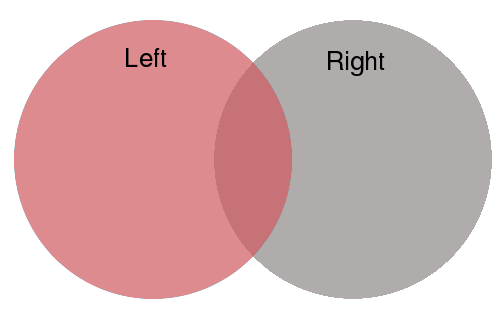

- We will also need to specify where the country name is located in each dataframe, which will be the `key` that is used to merge the dataframes ‘on’.
- Our ‘left’ dataframe (`realwage_f.transpose()`) contains countries in the index, so we set `left_index=True`.
- Our ‘right’ dataframe (`worlddata`) contains countries in the ‘Country’ column, so we set `right_on='Country'`.

In [1089]:
merged = pd.merge(realwage_f.transpose(), worlddata,
                  how='left', left_index=True, right_on='Country')
merged.head()

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
17.00,12.06,12.46,12.24,...,12.98,Australia,Australia
23.00,9.70,9.82,9.87,...,9.76,Belgium,Europe
32.00,0.87,0.92,0.96,...,1.24,Brazil,South America
100.00,6.89,6.96,7.24,...,8.48,Canada,North America
38.00,1.42,1.45,1.44,...,1.91,Chile,South America


- Countries that appeared in `realwage_f` but not in `worlddata` will have `NaN` in the Continent column.
- To check whether this has occurred, we can use `.isnull()` on the continent column and filter the merged dataframe

In [1090]:
merged[merged['Continent'].isnull()]

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
NaN,3.42,3.74,3.87,...,5.28,Korea,NaN
NaN,0.23,0.45,0.39,...,0.55,Russian Federation,NaN
NaN,1.50,1.64,1.71,...,2.08,Slovak Republic,NaN


- We have three missing values!
- One option to deal with NaN values is to create a dictionary containing these countries and their respective continents.
- `.map()` will match countries in `merged['Country']` with their continent from the dictionary.
- Notice how countries not in our dictionary are mapped with `NaN`.

In [1091]:
missing_continents = {'Korea': 'Asia',
                      'Russian Federation': 'Europe',
                      'Slovak Republic': 'Europe'}

merged['Country'].map(missing_continents)

17.00        NaN
23.00        NaN
32.00        NaN
100.00       NaN
38.00        NaN
108.00       NaN
41.00        NaN
225.00       NaN
53.00        NaN
58.00        NaN
45.00        NaN
68.00        NaN
233.00       NaN
86.00        NaN
88.00        NaN
91.00        NaN
NaN         Asia
117.00       NaN
122.00       NaN
123.00       NaN
138.00       NaN
153.00       NaN
151.00       NaN
174.00       NaN
175.00       NaN
NaN       Europe
NaN       Europe
198.00       NaN
200.00       NaN
227.00       NaN
241.00       NaN
240.00       NaN
Name: Country, dtype: object

- We don’t want to overwrite the entire series with this mapping.
- `.fillna()` only fills in `NaN` values in `merged['Continent']` with the mapping, while leaving other values in the column unchanged

In [1092]:
merged['Continent'] = merged['Continent'].fillna(merged['Country'].map(missing_continents))

# Check for whether continents were correctly mapped

merged[merged['Country'] == 'Korea']

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
NaN,3.42,3.74,3.87,...,5.28,Korea,Asia


- We will also combine the Americas into a single continent - this will make our visualization nicer later on.
- To do this, we will use `.replace()` and loop through a list of the continent values we want to replace

In [1093]:
replace = ['Central America', 'North America', 'South America']

for country in replace:
    merged['Continent'].replace(to_replace=country,
                                value='America',
                                inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15188\2897028784.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged['Continent'].replace(to_replace=country,


- Now that we have all the data we want in a single `DataFrame`, we will reshape it back into panel form with a `MultiIndex`.
- We should also ensure to sort the index using `.sort_index()` so that we can efficiently filter our dataframe later on.
- By default, levels will be sorted top-down

In [1094]:
merged = merged.set_index(['Continent', 'Country']).sort_index()
merged.head()

2006-01-01  2007-01-01  2008-01-01  ...  2014-01-01  \
Continent Country                                         ...               
America   Brazil            0.87        0.92        0.96  ...        1.21   
          Canada            6.89        6.96        7.24  ...        8.22   
          Chile             1.42        1.45        1.44  ...        1.76   
          Colombia          1.01        1.02        1.01  ...        1.13   
          Costa Rica         NaN         NaN         NaN  ...        2.41   

                      2015-01-01  2016-01-01  
Continent Country                             
America   Brazil            1.21        1.24  
          Canada            8.35        8.48  
          Chile             1.81        1.91  
          Colombia          1.13        1.12  
          Costa Rica        2.56        2.63  

[5 rows x 11 columns]

- While merging, we lost our `DatetimeIndex`, as we merged columns that were not in datetime format

In [1095]:
merged.columns

Index([2006-01-01 00:00:00, 2007-01-01 00:00:00, 2008-01-01 00:00:00,
       2009-01-01 00:00:00, 2010-01-01 00:00:00, 2011-01-01 00:00:00,
       2012-01-01 00:00:00, 2013-01-01 00:00:00, 2014-01-01 00:00:00,
       2015-01-01 00:00:00, 2016-01-01 00:00:00],
      dtype='object')

- Now that we have set the merged columns as the index, we can recreate a `DatetimeIndex` using `.to_datetime()`.

In [1096]:
merged.columns = pd.to_datetime(merged.columns)
merged.columns = merged.columns.rename('Time')
merged.columns

DatetimeIndex(['2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='Time', freq=None)

- The `DatetimeIndex` tends to work more smoothly in the row axis, so we will go ahead and transpose `merged`.

In [1097]:
merged = merged.transpose()
merged.head()

Continent  America               ...   Europe                     
Country     Brazil Canada Chile  ... Slovenia Spain United Kingdom
Time                             ...                              
2006-01-01    0.87   6.89  1.42  ...     3.92  3.99           9.81
2007-01-01    0.92   6.96  1.45  ...     3.88  4.10          10.07
2008-01-01    0.96   7.24  1.44  ...     3.96  4.14          10.04
2009-01-01    1.03   7.67  1.52  ...     4.08  4.32          10.15
2010-01-01    1.08   7.94  1.56  ...     4.81  4.30           9.96

[5 rows x 32 columns]

#### 1.4.3. Grouping and Summarizing Data

- Grouping and summarizing data can be particularly useful for understanding large panel datasets.
- A simple way to summarize data is to call an **aggregation method** on the dataframe, such as `.mean()` or `.max()`.
    - For example, we can calculate the average real minimum wage for each country over the period 2006 to 2016 (the default is to aggregate over rows)

In [1098]:
merged.mean().head(10)

Continent  Country      
America    Brazil          1.09
           Canada          7.82
           Chile           1.62
           Colombia        1.07
           Costa Rica      2.53
           Mexico          0.53
           United States   7.15
Asia       Israel          5.95
           Japan           6.18
           Korea           4.22
dtype: float64

- Using this series, we can plot the average real minimum wage over the past decade for each country in our data set

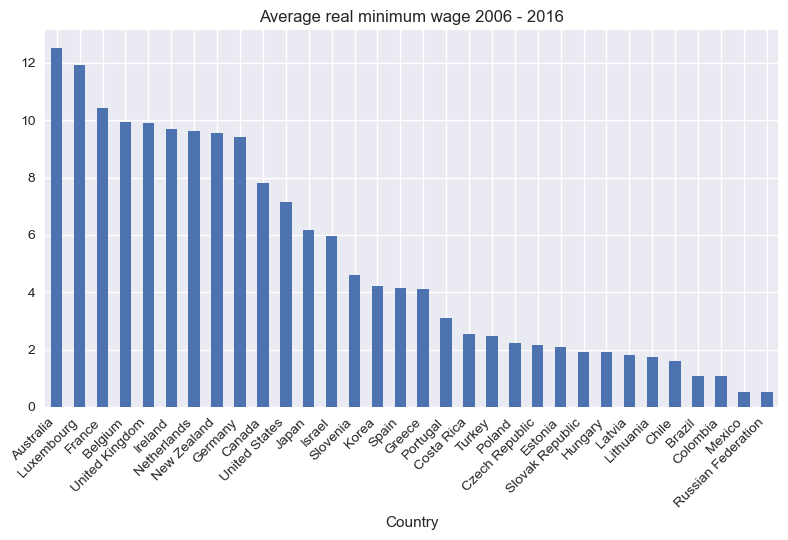

In [1099]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (11, 5)
plt.style.use("seaborn-v0_8")  # updated matplotlib seaborn style

# Compute the average once (avoid repeating the same calculation)
s = merged.mean().sort_values(ascending=False)

# Build country labels (works with MultiIndex or a regular Index)
if isinstance(s.index, pd.MultiIndex) and "Country" in s.index.names:
    country_labels = s.index.get_level_values("Country")
else:
    country_labels = s.index

# Reindex with country labels so the bar chart is correctly labeled
s_plot = pd.Series(s.values, index=country_labels)

ax = s_plot.plot(kind="bar", title="Average real minimum wage 2006 - 2016")
ax.set_xlabel("Country")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


- Passing in `axis=1` to `.mean()` will aggregate over columns (giving the average minimum wage for all countries over time)

In [1100]:
merged.mean(axis=1).head()

Time
2006-01-01   4.69
2007-01-01   4.84
2008-01-01   4.90
2009-01-01   5.08
2010-01-01   5.11
dtype: float64

- We can plot this time series as a line graph

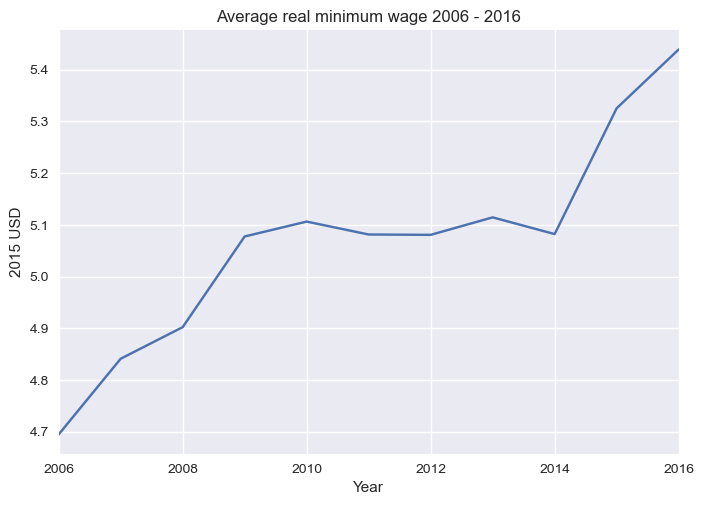

In [1101]:
merged.mean(axis=1).plot()
plt.title('Average real minimum wage 2006 - 2016')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

- We can also specify a level of the `MultiIndex` (in the column axis) to aggregate over

In [1102]:
merged.groupby(level='Continent', axis=1).mean().head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15188\646686994.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  merged.groupby(level='Continent', axis=1).mean().head()


Continent,America,Asia,Australia,Europe
Time,,,,
2006-01-01,2.80,4.29,10.25,4.80
2007-01-01,2.85,4.44,10.73,4.94
2008-01-01,2.99,4.45,10.76,4.99
2009-01-01,3.23,4.53,10.97,5.16
2010-01-01,3.34,4.53,10.95,5.17


- We can plot the average minimum wages in each continent as a time series

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15188\3178377022.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  merged.groupby(level='Continent', axis=1).mean().plot()


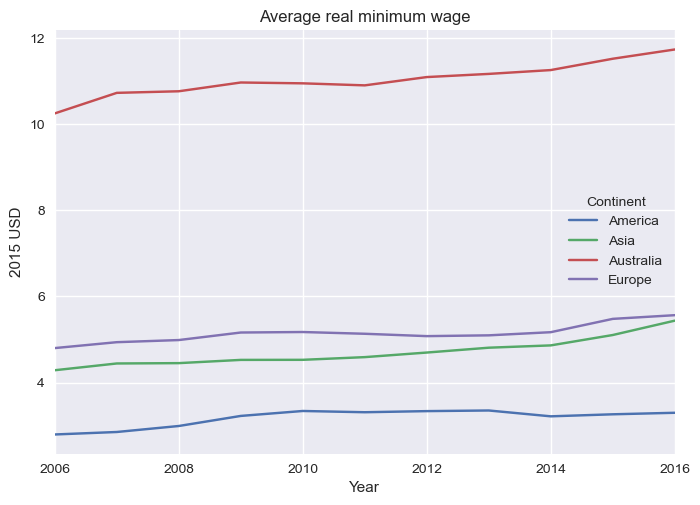

In [1103]:
merged.groupby(level='Continent', axis=1).mean().plot()
plt.title('Average real minimum wage')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

- We will drop Australia as a continent for plotting purposes

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15188\1828148450.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  merged.groupby(level='Continent', axis=1).mean().plot()


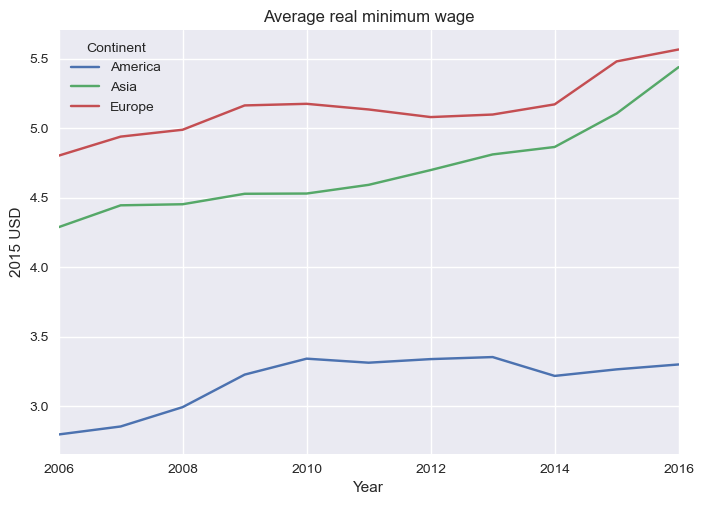

In [1104]:
merged = merged.drop('Australia', level='Continent', axis=1)
merged.groupby(level='Continent', axis=1).mean().plot()
plt.title('Average real minimum wage')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

- `.describe()` is useful for quickly retrieving a number of common summary statistics

In [1105]:
merged.stack().describe()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15188\4288984536.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  merged.stack().describe()


Continent,America,Asia,Europe
count,69.00,44.00,200.00
mean,3.19,4.70,5.15
std,3.02,1.56,3.82
min,0.52,2.22,0.23
25%,1.03,3.37,2.02
50%,1.44,5.48,3.54
75%,6.96,5.95,9.70
max,8.48,6.65,12.39


- This is a simplified way to use `groupby`.
- Using `groupby` generally follows a ‘split-apply-combine’ process:
    - `split`: data is grouped based on one or more keys
    - `apply`: a function is called on each group independently
    - `combine`: the results of the function calls are combined into a new data structure
- The `groupby` method achieves the first step of this process, creating a new `DataFrameGroupBy` object with data split into groups.
- Let’s split `merged` by continent again, this time using the `groupby` function, and name the resulting object `grouped`.

In [1106]:
grouped = merged.groupby(level='Continent', axis=1)
grouped

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15188\920372348.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  grouped = merged.groupby(level='Continent', axis=1)


- Calling an aggregation method on the object applies the function to each group, the results of which are combined in a new data structure.
    - For example, we can return the number of countries in our dataset for each continent using `.size()`.
- In this case, our new data structure is a `Series`.

In [1107]:
grouped.size()

Continent
America     7
Asia        4
Europe     19
dtype: int64

- Calling `.get_group()` to return just the countries in a single group, we can create a kernel density estimate of the distribution of real minimum wages in 2016 for each continent.
- `grouped.groups.keys()` will return the keys from the `groupby` object.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15188\13690229.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grouped.get_group(continent).loc['2015'].unstack(), label=continent, shade=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_15188\13690229.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grouped.get_group(continent).loc['2015'].unstack(), label=continent, shade=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_15188\13690229.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(grouped.get_group(continent).loc['2015'].unstack(), label=continent, shade=True)


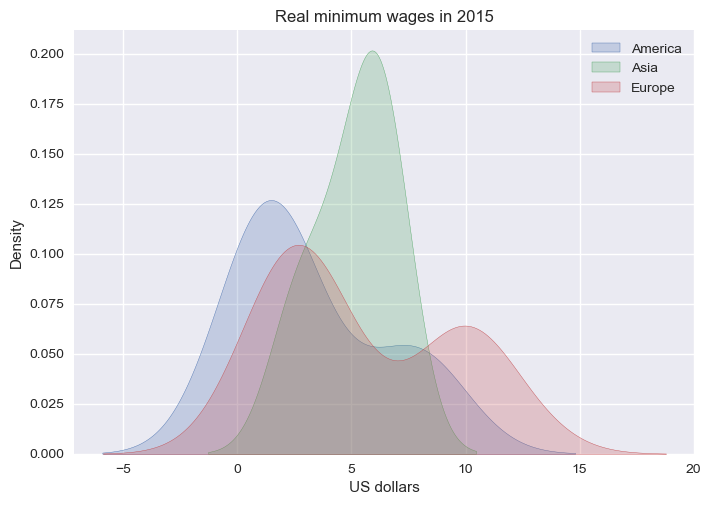

In [1108]:
import seaborn as sns

continents = grouped.groups.keys()

for continent in continents:
    sns.kdeplot(grouped.get_group(continent).loc['2015'].unstack(), label=continent, shade=True)

plt.title('Real minimum wages in 2015')
plt.xlabel('US dollars')
plt.legend()
plt.show()

**[Exercise]**

- In these exercises, you’ll work with a dataset of employment rates in Europe by age and sex from Eurostat.
- The dataset can be accessed with the following link:

```python
url3 = 'https://raw.githubusercontent.com/QuantEcon/lecture-python/master/source/_static/lecture_specific/pandas_panel/employ.csv'
```

- Reading in the CSV file returns a panel dataset in long format.
- Use `.pivot_table()` to construct a wide format dataframe with a `MultiIndex` in the columns.
- Start off by exploring the dataframe and the variables available in the `MultiIndex` levels.
- Write a program that quickly returns all values in the `MultiIndex`.

In [1109]:
# Your Code Here!

**[Exercise]**

- Filter the above dataframe to only include employment as a percentage of ‘active population’.
- Create a grouped boxplot using `seaborn ` of employment rates in 2015 by age group and sex.
- Note that `GEO` includes both areas and countries.

In [1110]:
# Your Code Here!

#### 1.4.4. Final Remarks

- This section has provided an introduction to some of pandas’ more advanced features, including multiindices, merging, grouping and plotting.
- Other tools that may be useful in panel data analysis include `xarray`, a python package that extends pandas to N-dimensional data structures.

## **2. Visualization Practice with Example**

In [1111]:
del sns

In [1112]:
plt.style.use('default')

In [1113]:
!pip install quandl

In [1114]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.transforms as transforms
import quandl

quandl.ApiConfig.api_key = os.environ.get("QUANDL_AUTH", "Dn6BtVoBhzuKTuyo6hbp")


%matplotlib inline

- We have already seen a few examples of basic visualizations created using the `.plot` method for a DataFrame.
- When we use the `.plot` method, pandas uses a package called matplotlib that actually creates the visualization.
- In this section, we will dive deeper into the customization options in the DataFrame `.plot` method as well as look under the hood at how to use matplotlib directly to unlock unlimited control over our figures.

### 2.1. Replicate a Professional Figure

- Visualization is a complex subject.
- [Many books](https://www.amazon.com/s?k=data+visualization&i=stripbooks&rh=n%3A283155&ref=nb_sb_noss) have been written on the subject.
- We cannot hope to convey all of what is possible in a short lecture, so we thought we’d try something fun instead.
- Our goal in this lecture is to show off some of the common – and some not-so-common – matplotlib capabilities to try to re-create this striking figure from a [Financial Times article](https://www.ft.com/content/4743ce96-e4bf-11e7-97e2-916d4fbac0da).
- The figure shows how we can see the anticipation of and response to iPhone announcements in Apple stock share prices.

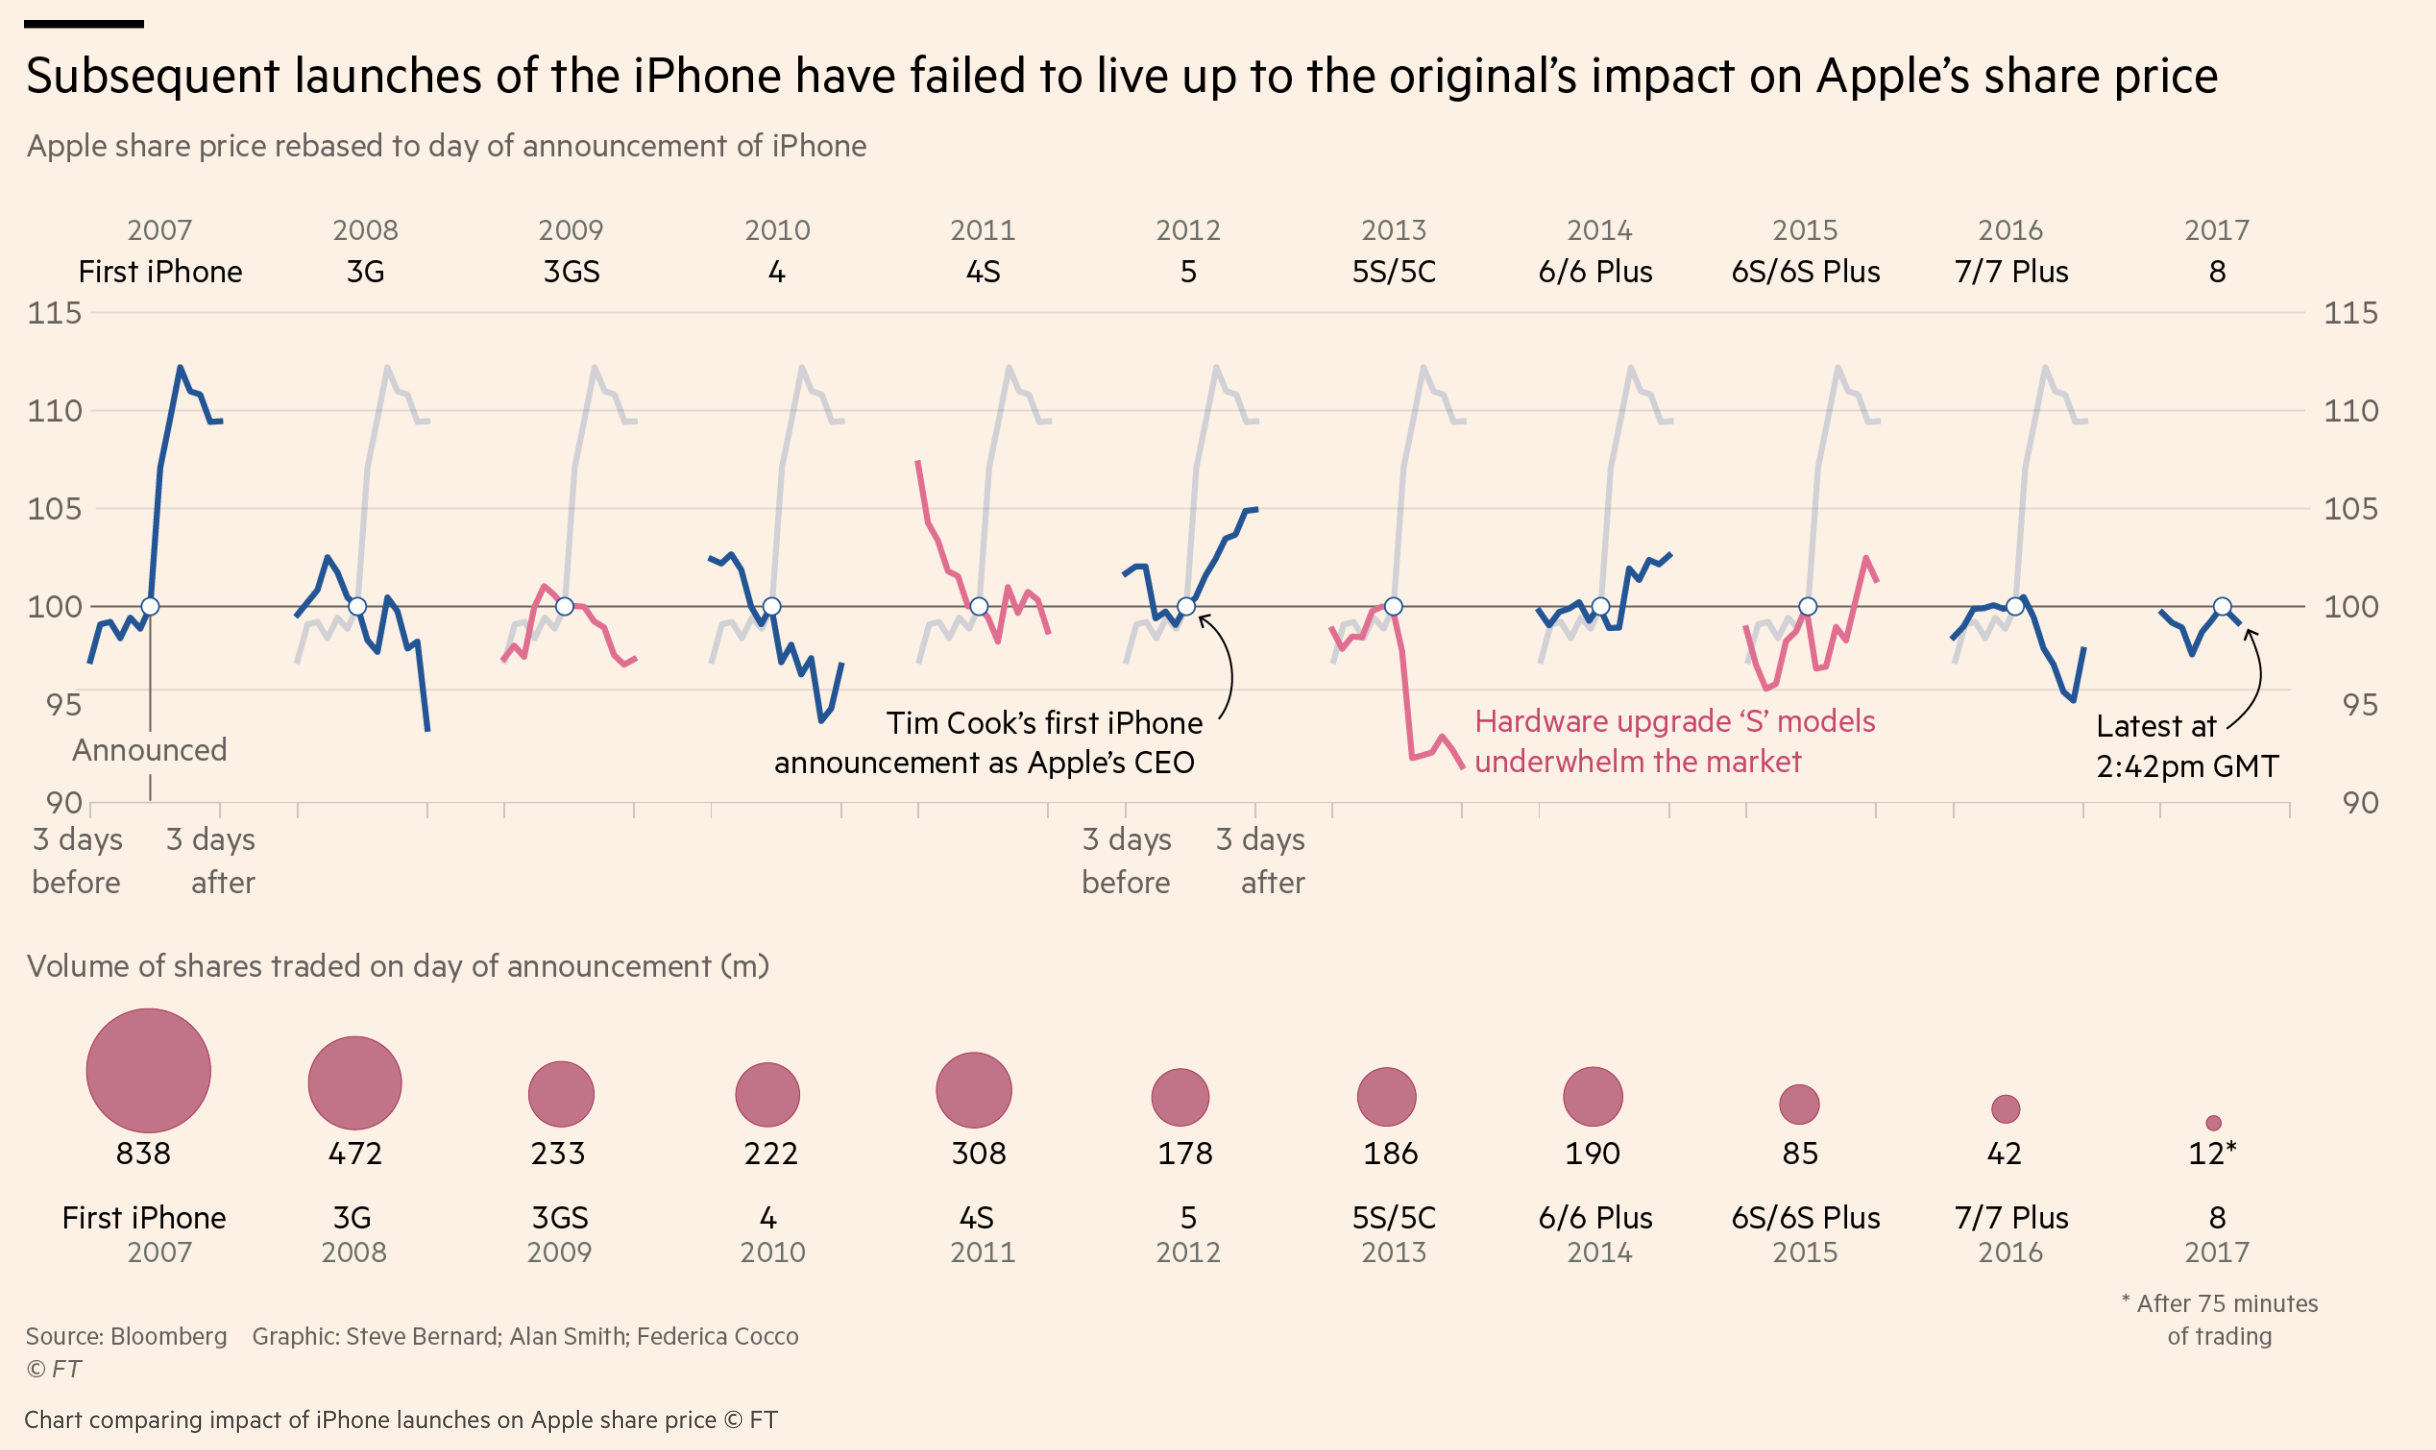

- Our goal is to **replicate the top portion of this figure** in this section.
- **[Disclaimer]**
    - Many tools you will see in this lecture will be “more advanced” than what you typically use when customizing a plot.
    - Don’t (please!) try to memorize the commands used here – the purpose of the lecture is to show what is possible and expose you a variety of the methods you can use.

### 2.2. Data

- Let’s get the data.
- First, we create a Series containing the date of each iPhone announcement that appears in the FT original chart.
- As there have only been 11 of them and we couldn’t find this “dataset” online anywhere, we will do this by hand.

In [1115]:
announcement_dates = pd.Series(
    [
        "First iPhone", "3G", "3GS", "4", "4S", "5", "5S/5C", "6/6 Plus",
        "6S/6S Plus", "7/7 Plus", "8/8 Plus/X"
    ],
    index=pd.to_datetime([
        "Jan. 9, 2007", "Jun. 9, 2008", "Jun. 8, 2009", "Jan. 11, 2011",
        "Oct. 4, 2011", "Sep. 12, 2012", "Sep. 10, 2013", "Sep. 9, 2014",
        "Sep. 9, 2015", "Sep. 7, 2016", "Sep. 12, 2017"
    ]),
    name="Model"
)
announcement_dates

2007-01-09    First iPhone
2008-06-09              3G
2009-06-08             3GS
2011-01-11               4
2011-10-04              4S
2012-09-12               5
2013-09-10           5S/5C
2014-09-09        6/6 Plus
2015-09-09      6S/6S Plus
2016-09-07        7/7 Plus
2017-09-12      8/8 Plus/X
Name: Model, dtype: object

- Then, let’s grab Apple’s stock price data from `quandl`, starting a few weeks before the first announcement.

In [1116]:
# Why are Quandl (WIKI/AAPL) and Stooq (AAPL.US) different?
# 1) WIKI Prices is not updated since April 2018:
#    https://github.com/quantopian/zipline/issues/2145
# 2) WIKI includes OHLC + adjusted prices + dividends/splits info (example discussion):
#    https://www.packtpub.com/en-us/product/python-for-finance-cookbook-second-edition-9781803243191/chapter/acquiring-financial-data-1/section/getting-data-from-nasdaq-data-link-ch01lvl1sec03
# 3) Adjusted Close = adjusted for splits + dividends (definition):
#    https://help.yahoo.com/kb/SLN28256.html
# 4) Stooq offers split/dividend-corrected downloads (depends on settings):
#    https://www.chartoasis.com/free-data-download-stooq-help-cop3/
#    https://www.fundmanagersoftware.com/intrtv.html


In [1117]:
import pandas_datareader.data as web

aapl = web.DataReader("AAPL.US", "stooq", start="2006-12-25").sort_index()
aapl.head()


,Open,High,Low,Close,Volume
Date,,,,,
2006-12-26,2.47,2.49,2.43,2.45,581688190
2006-12-27,2.35,2.47,2.31,2.45,2296761919
2006-12-28,2.41,2.45,2.40,2.43,1328928975
2006-12-29,2.53,2.57,2.51,2.55,1277320141
2007-01-03,2.60,2.61,2.46,2.52,1469419698


### 2.3. Warmup

- Matplotlib figures are composed two main types of Python objects:
    1. `Figure`: represents the entirety of the visualization
    2. `Axes`: A (potentially full) subset of the figure on which things are drawn
- Most of the time, we will customize our plots by calling methods on an Axes object.
- However, things like setting a title over the entire plot or saving the plot to a file on your computer require methods on a `Figure`.
- Let’s start by getting our hands dirty and practicing using these objects.

**[Exercise]**

- Using the `.plot` method, plot the opening share price for Apple’s stock.
- What `type` of object is returned from that method?
- What methods does this object have?

In [1118]:
# make plot here

In [1119]:
# explore methods here

- You should have seen that the object returned by the `.plot` method is a `matplotlib Axes`.
- As mentioned above, we can control most aspects of a plot by calling methods on an Axes.
- Let’s see some examples.

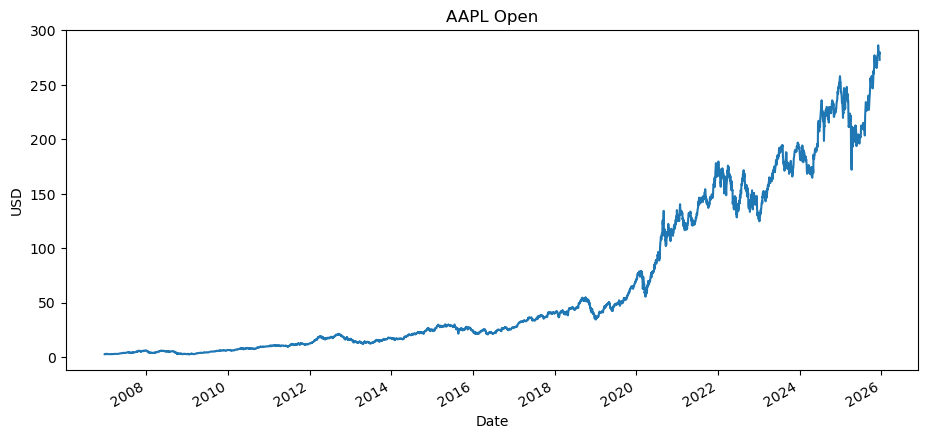

In [1120]:
import matplotlib.pyplot as plt

ax = aapl["Open"].plot(figsize=(11, 5))
ax.set_title("AAPL Open")
ax.set_xlabel("Date")
ax.set_ylabel("USD")

fig = ax.get_figure()
plt.show()


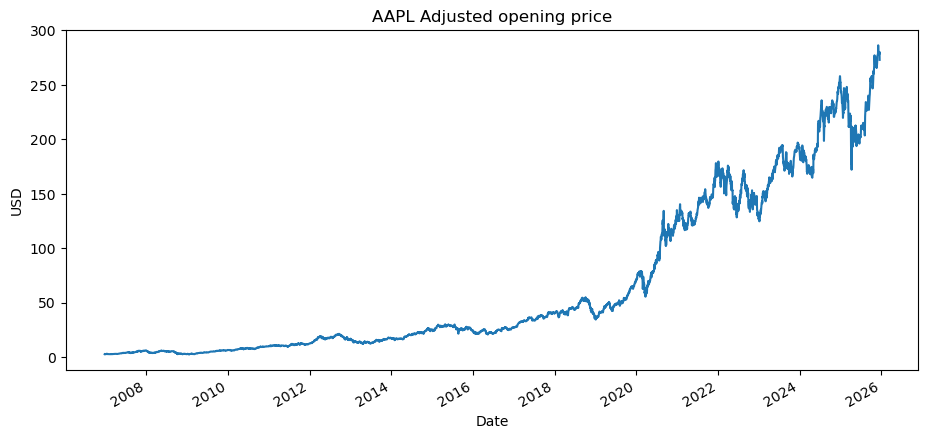

In [1121]:
# set the title
ax.set_title("AAPL Adjusted opening price")

fig

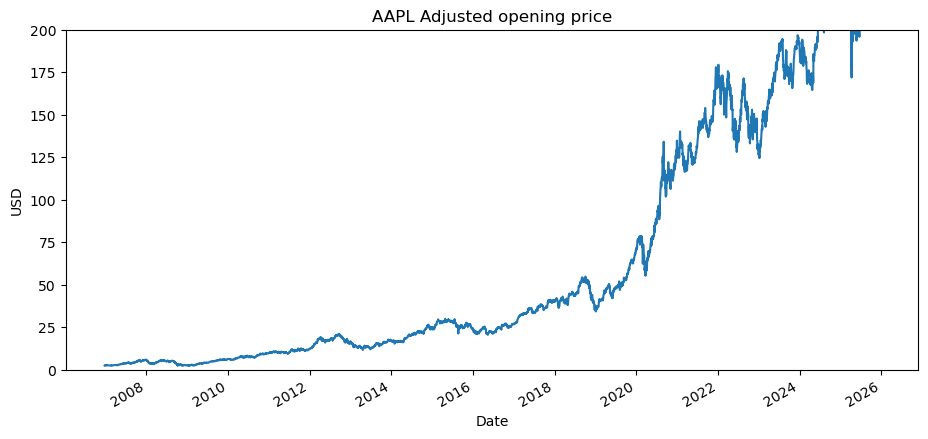

In [1122]:
ax.set_ylim(0, 200)
fig

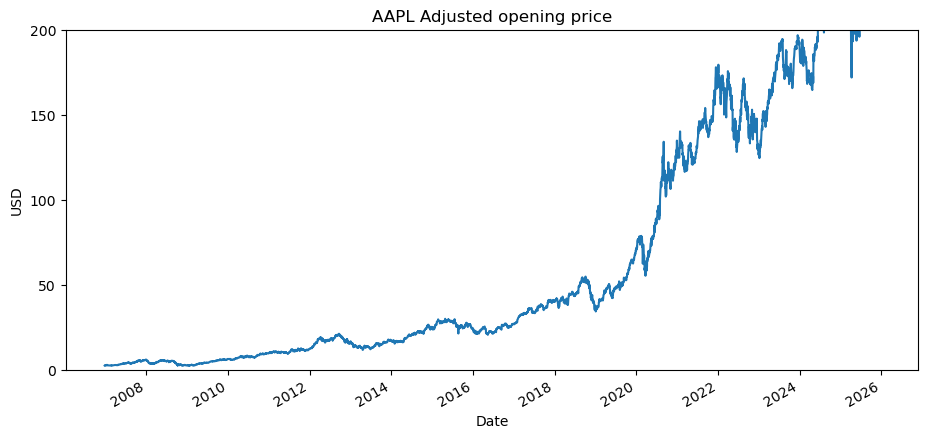

In [1123]:
ax.set_yticks([0, 50, 100, 150, 200])
fig

- We can also create a Figure and Axes beforehand and then tell pandas to plot a DataFrame or Series’ data on the axis.
- We typically use the `plt.subplots` function to create the Figure and Axes.
- Below, we use this function to create a Figure that is 10 inches wide by 6 inches tall and filled with a one by two grid of Axes objects.

type(fig2):  <class 'matplotlib.figure.Figure'>
type(axs):  <class 'numpy.ndarray'>
axs2.shape:  (2,)


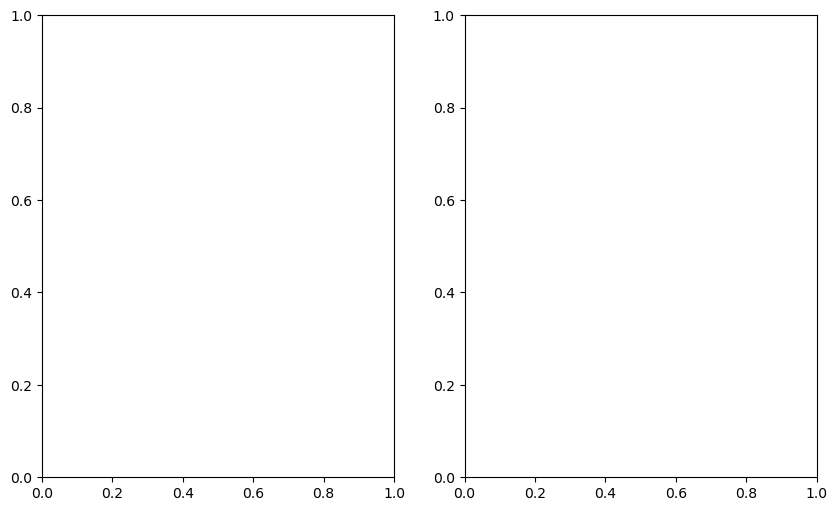

In [1124]:
fig2, axs2 = plt.subplots(1, 2, figsize=(10, 6))

print("type(fig2): ", type(fig2))
print("type(axs): ", type(axs2))
print("axs2.shape: ", axs2.shape)

- We can plot from our DataFrame directly on our Axes objects by setting the ax argument when calling `.plot`.

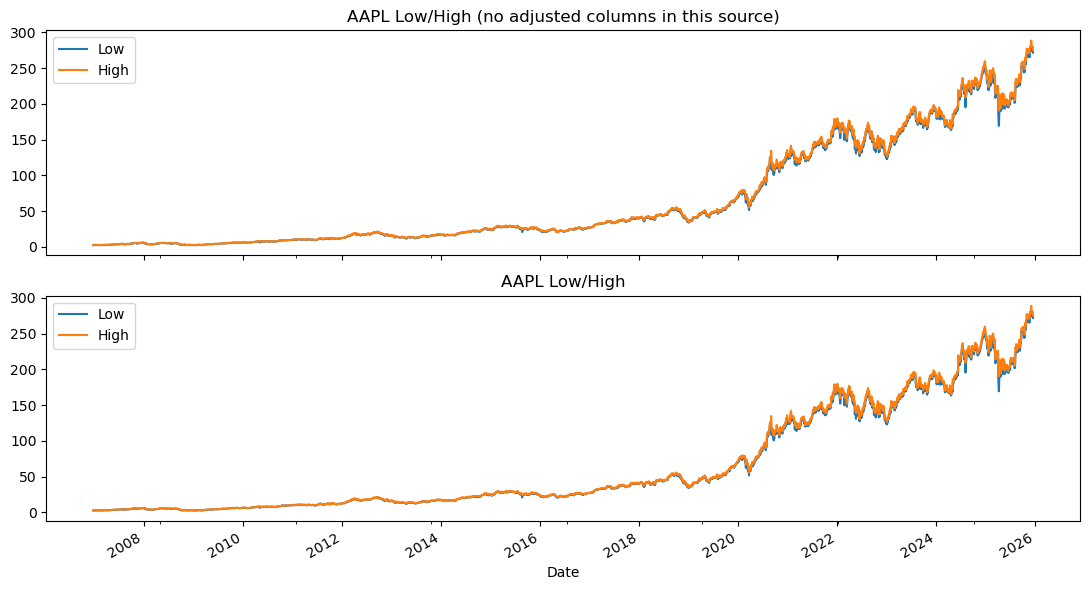

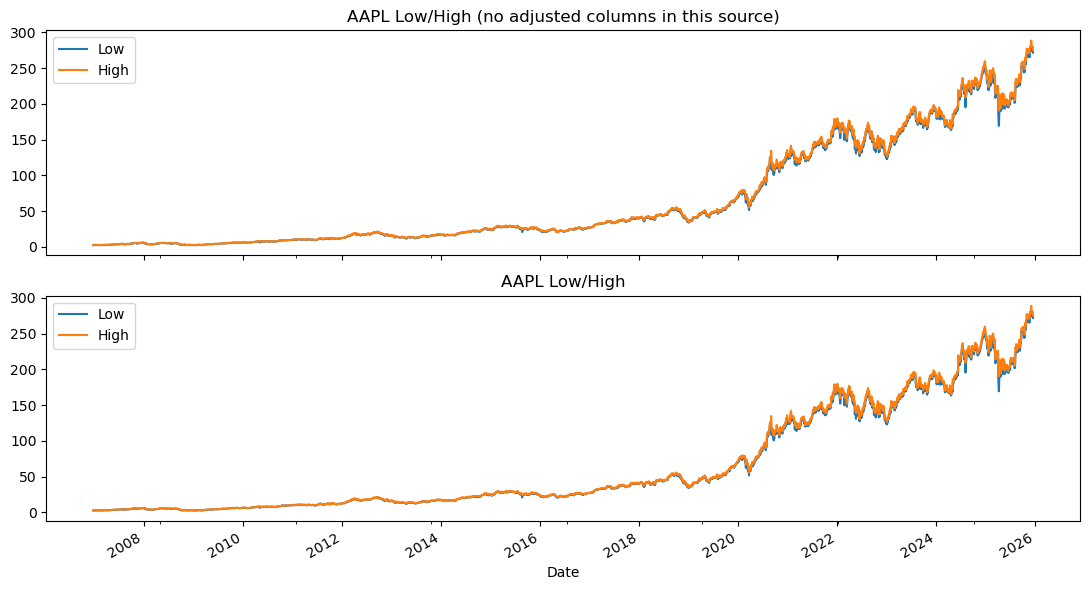

In [1125]:
import matplotlib.pyplot as plt

fig2, axs2 = plt.subplots(2, 1, figsize=(11, 6), sharex=True)

aapl[["Low", "High"]].plot(ax=axs2[0])
axs2[0].set_title("AAPL Low/High (no adjusted columns in this source)")

aapl[["Low", "High"]].plot(ax=axs2[1])
axs2[1].set_title("AAPL Low/High")

plt.tight_layout()
fig2


**[Exercise]**

- Using the `plt.subplots` function, make a Figure with a two-by-one grid of subplots (two rows, one column).
- On the upper Axes, plot the adjusted close price.
- On the lower one, plot the adjusted volume as an area chart (search for an argument on the `plot` method to change the kind of plot).
- Google for how to set a title for a `Figure` object and then do so.

In [1126]:
# code

**[Exercise]**

- Take 5 minutes to explore the different arguments to the DataFrame .plot method. Try to make a plot that is both good looking and interesting ( we know, those are subjective, but do your best!).
- Some arguments you might consider exploring are:
    - `sharex` or `sharey`
    - `style`
    - `grid`
    - `color`
    - `kind`
- You can browse the official pandas plotting documentation for inspiration.

In [1127]:
# code

### 2.4. Data Cleaning

- Let’s continue on our path to recreating the Financial Times visualization from above.
- Before we can actually make the plot, we first have to clean the data.
- Looking at our goal, we will need share price three days before and after each announcement.
- We will also need to normalize the share price to be 100 on the day of the announcement and scale the neighboring days accordingly.

In [1128]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

bday_us = CustomBusinessDay(calendar=USFederalHolidayCalendar())

def neighbor_dates(date, nbefore=3, nafter=3):
    # Make sure the date is a datetime
    date = pd.to_datetime(date)

    # Create a list of business days
    before_and_after = [date + i*bday_us for i in range(-nbefore, nafter+1)]

    return before_and_after


dates = []
for ann_date in announcement_dates.index:
    dates.extend(neighbor_dates(ann_date))
dates = pd.Series(dates)

# Index into our DataFrame using the new dates
prices = aapl.loc[dates]
prices.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-04,2.53,2.59,2.52,2.58,1005360505
2007-01-05,2.58,2.59,2.54,2.56,990554666
2007-01-08,2.59,2.60,2.57,2.57,945344465
2007-01-09,2.60,2.80,2.56,2.79,3973568018
2007-01-10,2.85,2.94,2.81,2.92,3492577075


- We now want to bring information on iPhone models into the DataFrame.
- We do this by:
    - Joining on the announcement date. This will introduce a new column named `Model` which has a value in the announcement date but has 3 `NaN` above and below each announcement date (a total of 66 `NaN`)
    - Using the methods `ffill` and `bfill`, we can replace these `NaN`s with the corresponding model names.
    - `prices.ffill(limit=3)` will fill the three days after the announcement with the model name (down to 33 Nan)
    - `prices.bfill(limit=3)` will fill the three days before the announcement with the model name (no more `NaN`)

In [1129]:
prices = prices.join(announcement_dates)
print(prices["Model"].isnull().sum())
prices["Model"].head(7)

66


Date
2007-01-04             NaN
2007-01-05             NaN
2007-01-08             NaN
2007-01-09    First iPhone
2007-01-10             NaN
2007-01-11             NaN
2007-01-12             NaN
Name: Model, dtype: object

In [1130]:
prices = prices.ffill(limit=3)
print(prices["Model"].isnull().sum())
prices["Model"].head(7)

33


Date
2007-01-04             NaN
2007-01-05             NaN
2007-01-08             NaN
2007-01-09    First iPhone
2007-01-10    First iPhone
2007-01-11    First iPhone
2007-01-12    First iPhone
Name: Model, dtype: object

In [1131]:
prices = prices.bfill(limit=3)
print(prices["Model"].isnull().sum())
prices["Model"].head(7)

0


Date
2007-01-04    First iPhone
2007-01-05    First iPhone
2007-01-08    First iPhone
2007-01-09    First iPhone
2007-01-10    First iPhone
2007-01-11    First iPhone
2007-01-12    First iPhone
Name: Model, dtype: object

- Success!
- Now for the second part of the cleaning: normalize the share price on each announcement date to 100 and scale all neighbors accordingly.

In [1132]:
def scale_by_middle(df):
    # How many rows
    N = df.shape[0]

    # Divide by middle row and scale to 100
    # Note: N // 2 is modulus division meaning that it is
    #       rounded to nearest whole number)
    out = (df["Open"] / df.iloc[N // 2]["Open"]) * 100

    # We don't want to keep actual dates, but rather the number
    # of days before or after the announcment. Let's set that
    # as the index. Note the +1 because range excludes upper limit
    out.index = list(range(-(N//2), N//2+1))

    # also change the name of this series
    out.name = "DeltaDays"
    return out

In [1133]:
to_plot = prices.groupby("Model").apply(scale_by_middle).T
to_plot

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15188\3433067278.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  to_plot = prices.groupby("Model").apply(scale_by_middle).T


Model,3G,3GS,4,...,7/7 Plus,8/8 Plus/X,First iPhone
DeltaDays,,,,,,,
-3,99.49,97.34,97.11,...,98.45,99.67,97.33
-2,100.72,97.35,96.86,...,99.87,98.92,99.25
-1,101.66,101.12,98.21,...,100.07,98.70,99.42
0,100.00,100.00,100.00,...,100.00,100.00,100.00
1,97.53,99.94,99.55,...,99.46,98.31,109.57
2,99.68,98.66,100.06,...,97.03,97.76,110.97
3,98.12,97.04,100.29,...,95.19,97.46,109.32


- Re-order the columns.

In [1134]:
to_plot = to_plot[announcement_dates.values]
to_plot

Model,First iPhone,3G,3GS,...,6S/6S Plus,7/7 Plus,8/8 Plus/X
DeltaDays,,,,,,,
-3,97.33,99.49,97.34,...,98.87,98.45,99.67
-2,99.25,100.72,97.35,...,95.79,99.87,98.92
-1,99.42,101.66,101.12,...,98.12,100.07,98.70
0,100.00,100.00,100.00,...,100.00,100.00,100.00
1,109.57,97.53,99.94,...,96.93,99.46,98.31
2,110.97,99.68,98.66,...,98.24,97.03,97.76
3,109.32,98.12,97.04,...,102.47,95.19,97.46


### 2.5. Constructing the Plot

- Now that we have cleaned up the data, let’s construct the plot.
- We do this by using the DataFrame `.plot` method and then using the matplotlib methods and functions to fine tune our plot, changing one feature or set of features at a time.
- To prepare our use of the plot method, we will need to set up some data for what color each line should be, as well as where to draw the tick marks on the vertical axis.

In [1135]:
# colors
background = tuple(np.array([253, 238, 222]) / 255)
blue = tuple(np.array([20, 64, 134]) / 255)
pink = tuple(np.array([232, 75, 126]) / 255)

def get_color(x):
    if "S" in x:
        return pink
    else:
        return blue

colors = announcement_dates.map(get_color).values

# yticks
yticks = [90, 95, 100, 105, 110, 115]

- Below, we construct the basic plot using `to_plot.plot`.
- Notice that we have specified a few options as keyword arguments to our function.

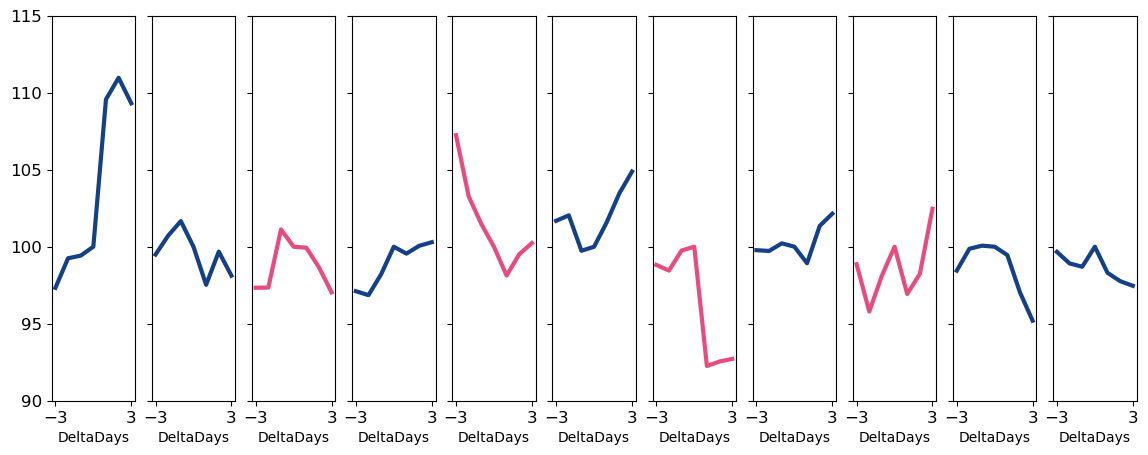

In [1136]:
# construct figure and Axes objects
fig, axs = plt.subplots(1, 11, sharey=True, figsize=(14, 5))

# We can pass our array of Axes and `subplots=True`
# because we have one Axes per column
to_plot.plot(
    ax=axs, subplots=True, legend=False,
    yticks=yticks, xticks=[-3, 3],
    color=colors, linewidth=3, fontsize=12
);

**[Exercise]**

- Think about what each of the argument we passed to `.plot` does.
- For some you might be able to guess, for others you will need to look at the documentation.
- For your reference, record your findings in a markdown cell below.
- Use `to_plot.plot?` to pull up the docs.

In [1137]:
# Your code Here!

#### 2.5.1. Subplot Spacing: `fig.tight_layout`

- That figure has the basic lines we are after, but is quite ugly when compared to the FT figure we are trying to produce.
- Let’s refine the plot one step at a time.
- First, notice how the `-3` and `3` labels are running into each other?
- This commonly happens in figures with many subplots.
- The function `fig.tight_layout()` will fix these problems – as well as **most other subplot spacing issues**.
- We almost always call this method when building a plot with multiple subplots.

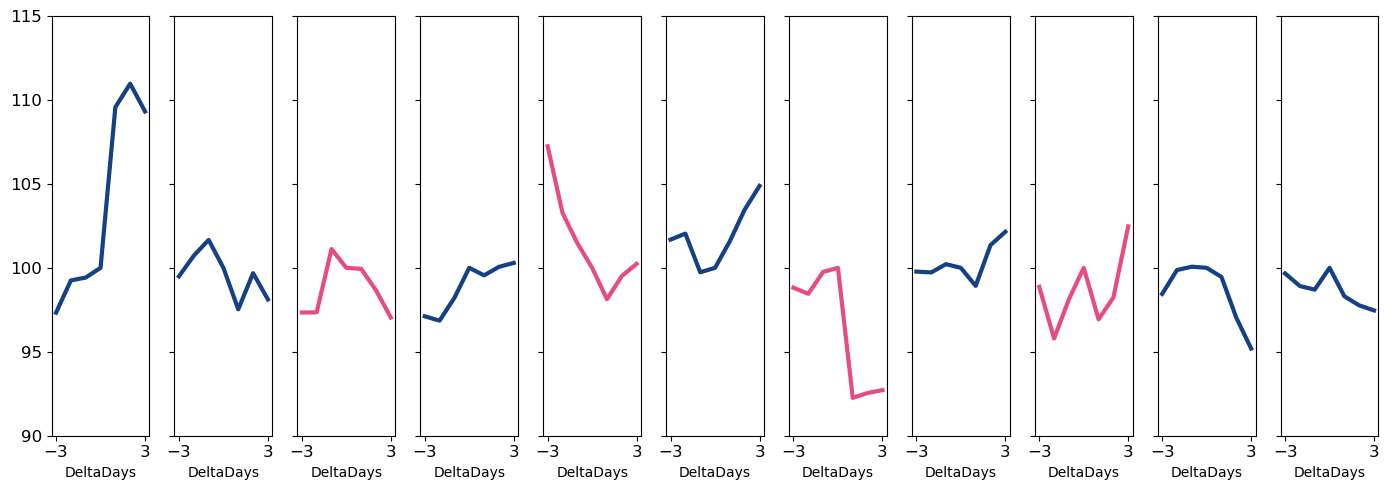

In [1138]:
# add some spacing around subplots
fig.tight_layout()
fig

#### 2.5.2. Properties of the Figure

- Now, let’s make the background of our figure match the background of the FT post.
- To do this, we will use the `fig.set_facecolor` method.

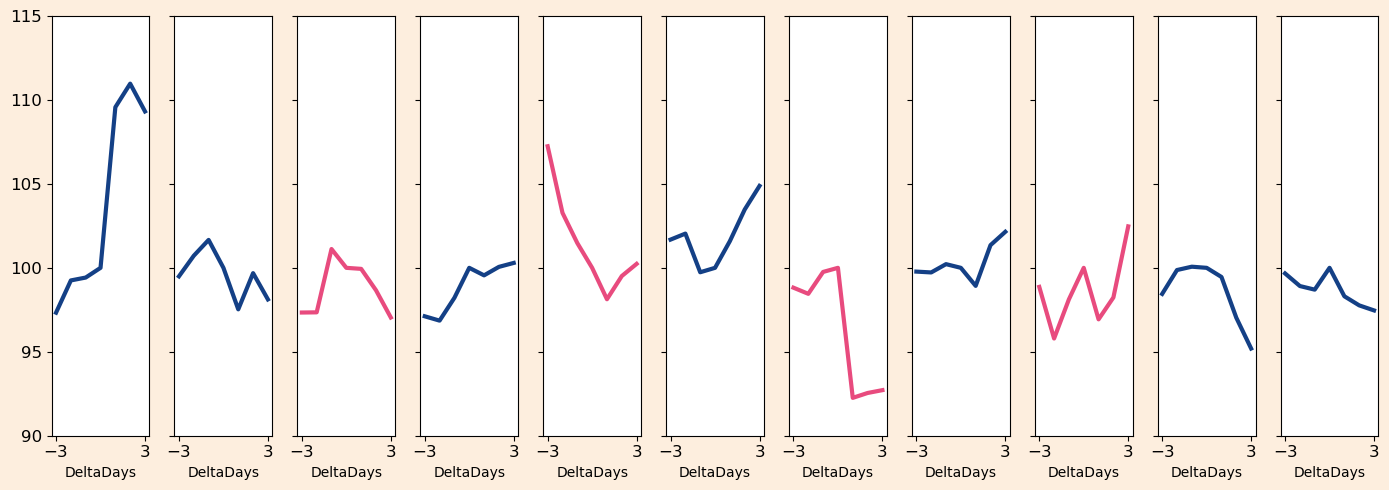

In [1139]:
# set background color
fig.set_facecolor(background)
fig

#### 2.5.3. Properties of an `Axes`

- Notice that this worked for the figure as a whole, but not for any of the Axes.
- To fix this, we will need to call .set_facecolor on each Axes.
- While we are doing that, let’s fix up a number of other things about the Axes:
    - Add Axes titles
    - Remove the x axis titles
    - Remove tick marks on y axis
    - Add a “faint” version of the line from the first subplot
    - Remove x axis tick labels
    - Make x axis ticks longer and semi-transparent
    - Make sure all Axes have same y limits
    - Remove the spines (the border on each Axes)
    - Add a white circle to (0, 100) on each Axes

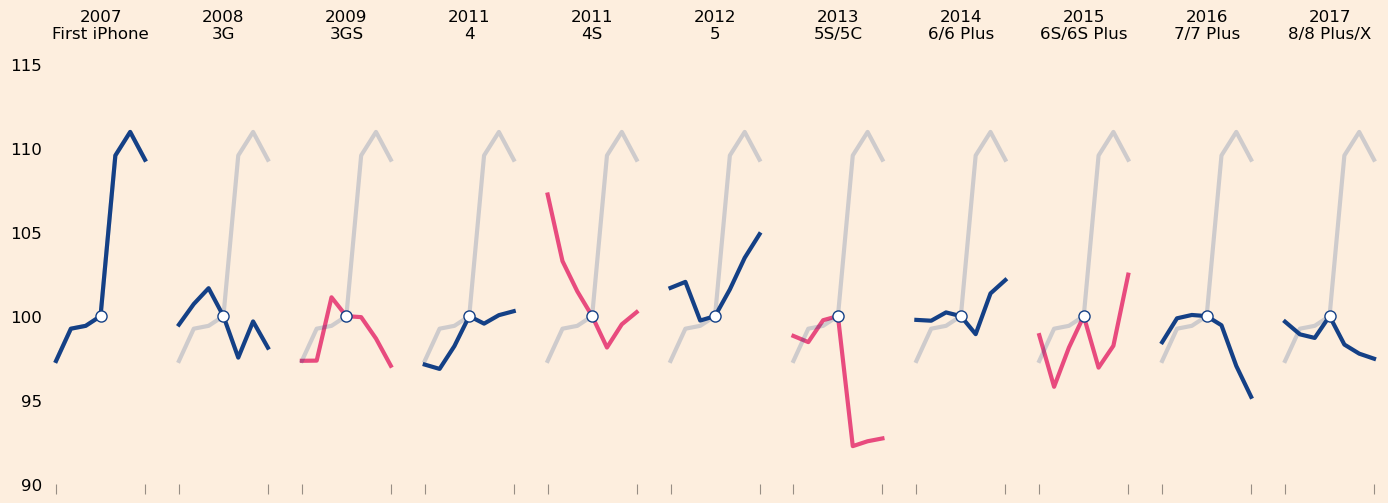

In [1140]:
# For each Axes... do the following
for i in range(announcement_dates.shape[0]):
    ax = axs[i]

    # add faint blue line representing impact of original iPhone announcement
    to_plot["First iPhone"].plot(ax=ax, color=blue, alpha=0.2, linewidth=3)

    # add a title
    ti = str(announcement_dates.index[i].year) + "\n" + announcement_dates.iloc[i] + "\n"
    ax.set_title(ti)

    # set background color of plotting area
    ax.set_facecolor(background)

    # remove xlabels
    ax.set_xlabel("")

    # turn of tick marks
    ax.tick_params(which="both", left=False, labelbottom=False)

    # make x ticks longer and semi-transparent
    ax.tick_params(axis="x", length=7.0, color=(0, 0, 0, 0.4))

    # set limits on vertical axis
    ax.set_ylim((yticks[0], yticks[-1]))

    # add a white circle at 0, 100
    ax.plot(0, 100, 'o', markeredgecolor=blue, markersize=8, color="white", zorder=10)

    # remove border around each subplot
    for direction in ["top", "right", "left", "bottom"]:
        ax.spines[direction].set_visible(False)


fig

**[Exercise]**

- For each operation in the list below (copied from above), make a note of which functions/methods were called to achieve the result. Edit the markdown cell containing the list directly.
- Note: This might seem redundant since the comments above give the answers, but forcing yourself to write out the names of the functions will help you remember them when you need them later on.
    - Change background color
    - Add Axes titles
    - Remove the x axis titles
    - Remove tick marks on y axis
    - Add a “faint” version of the line from the first subplot
    - Remove x axis tick labels
    - Make x axis ticks longer and semi-transparent
    - Make sure all Axes have same y limits
    - Remove the spines (the border on each Axes)
    - Add a white circle to (0, 100) on each Axes

In [1141]:
# Your code here!

- Let’s continue and add tick labels to the right of the far right Axes.

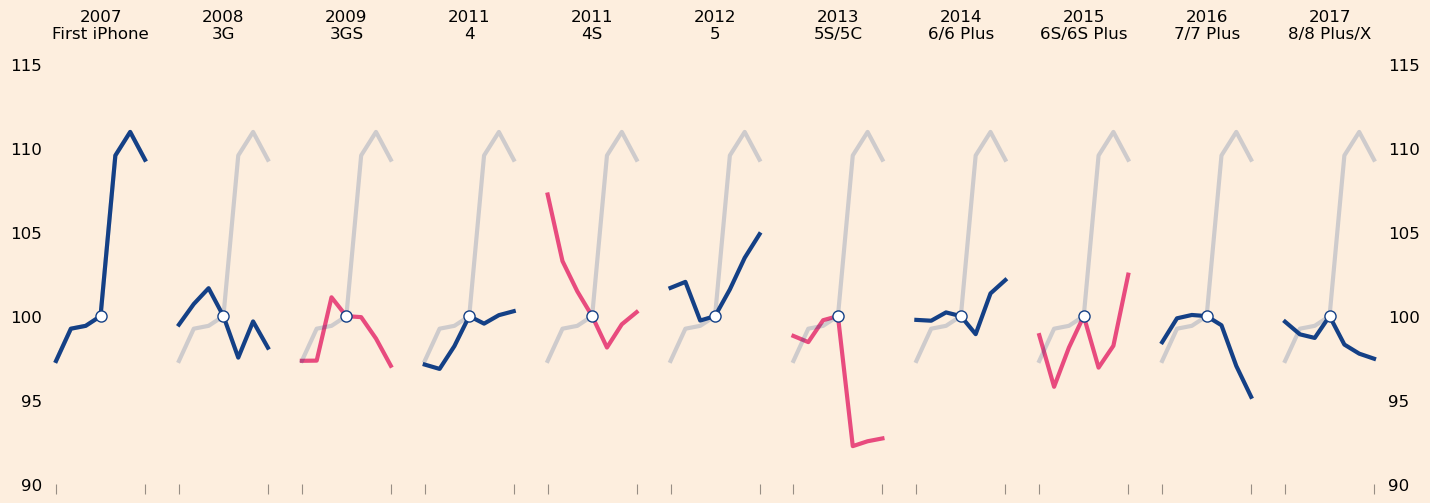

In [1142]:
# add tick labels to right of iPhone 8/X announcement
axs[-1].tick_params(labelright=True, labelsize=12)
axs[-1]
fig

- We can also add tick labels for the x-axis ticks on the 1st and 6th plots.

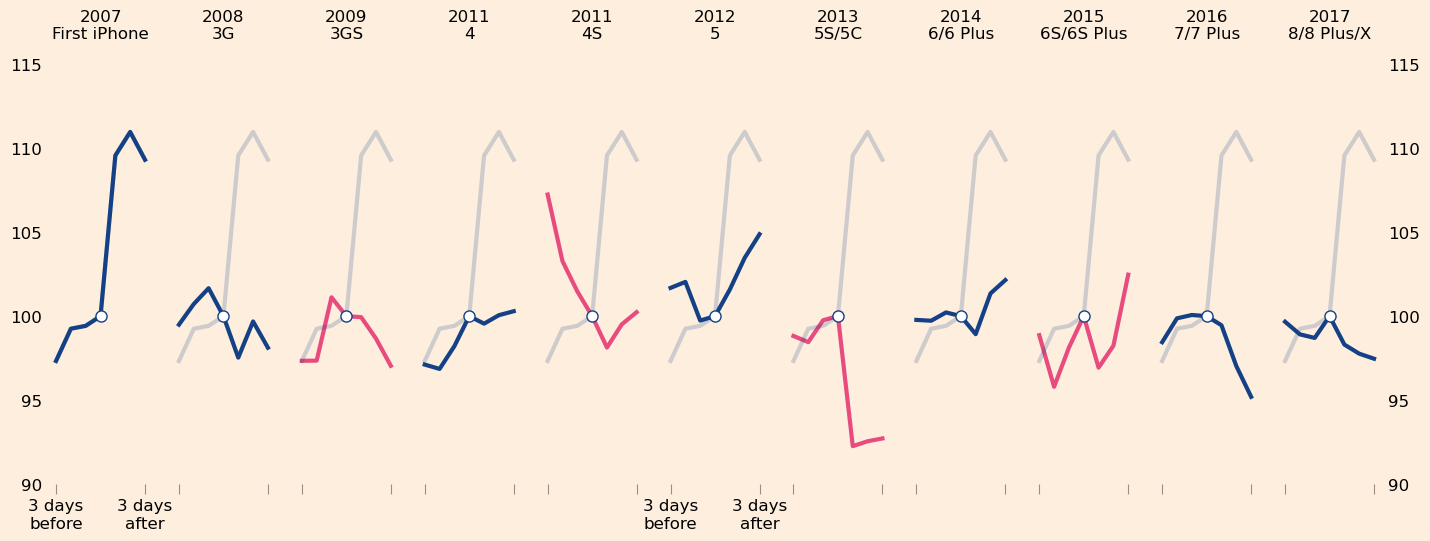

In [1143]:
for ax in axs[[0, 5]]:
    ax.tick_params(labelbottom=True)
    ax.set_xticklabels(["3 days\nbefore", "3 days\nafter"])

    # need to make these tick labels centered at tick,
    # instead of the default of right aligned
    for label in ax.xaxis.get_ticklabels():
        label.set_horizontalalignment("center")

fig

#### 2.5.4. Transforms and Lines

- Now we would like to add a horizontal line that lines up with each vertical tick label (the numbers from 90 to 115) and runs across the entire figure.
- This is actually harder than it sounds because most of the “drawing” capabilities of matplotlib are built around drawing on a single Axes and we want to draw across 11 of them.
- However, as we promised above, anything is possible and we will show you how to do it.
- When matplotlib draws any data – be it a line, circle, rectangle, or other – it must know what coordinate system to use.
- We typically think about drawing things in the data’s coordinate system (remember above how we added a white circle at (0, 100)).
- However, we might also want to draw using two other coordinate systems:
    - `Figure`: the bottom left of the figure is (0, 0) and top right is (1, 1)
    - `Axes`: The bottom left of an Axes is (0, 0) and top right is (1, 1)
- For our application, we would like to use the figure’s coordinate system in the `x` dimension (going across the plot), but the data’s coordinate system in the `y` dimension (so we make sure to put the lines at each of our `yticks`).
- Luckily for us, matplotlib provides a way to use exactly that coordinate system.

In [1144]:
# create a transform that...
trans = transforms.blended_transform_factory(
    fig.transFigure,  # goes across whole figure in x direction
    axs[0].transData  # goes up with the y data in the first axis
)

- We can now use `trans` to draw lines where the `x` values will map from (0, 1) in the Figure coordinates and the `y` values will go from (90, 115) on the data coordinates.

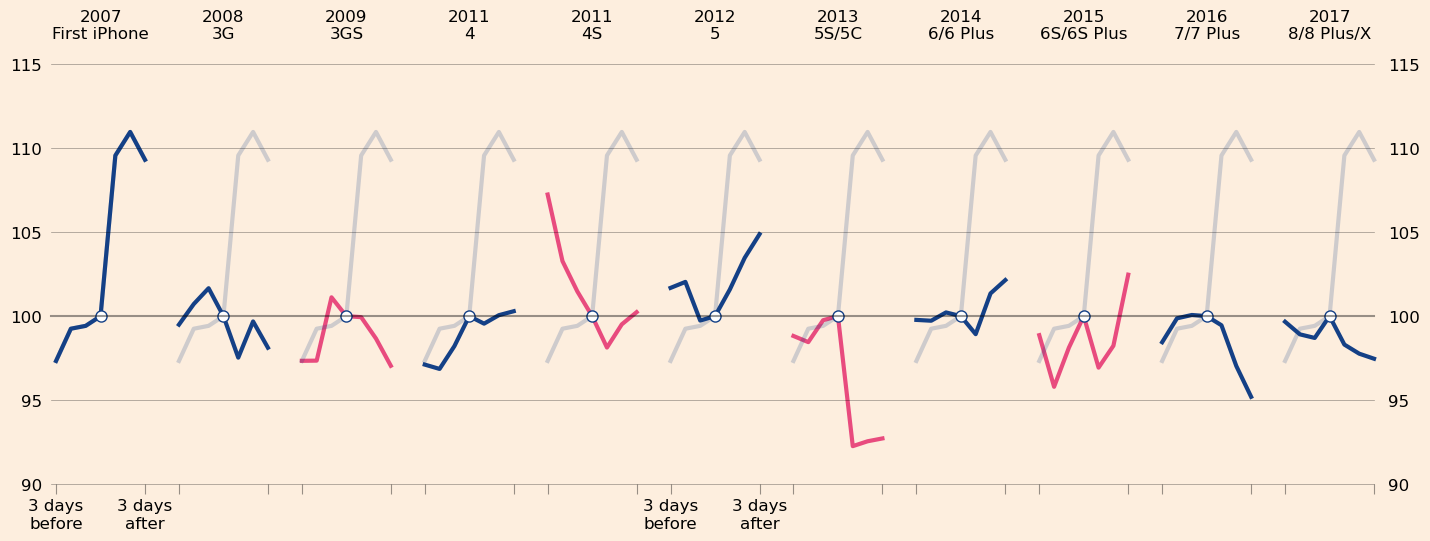

In [1145]:
for y in yticks:
    l = plt.Line2D(
        # x values found by trial and error
        [0.04, 0.985], [y, y],
        transform=trans,
        color="black", alpha=0.4, linewidth=0.5,
        zorder=0.1
    )

    if y == 100:
        l.set_linewidth(1.5)

    fig.lines.append(l)

fig

- Now, we need to a add vertical line from the (0, 90) to (0, 100) on the first axis so we can label the center of each line as the announcement date.
- We will split this line in two to leave room for the text `Announced` to be added soon.
- To add the lines, we will use the data coordinate system from the first Axes.

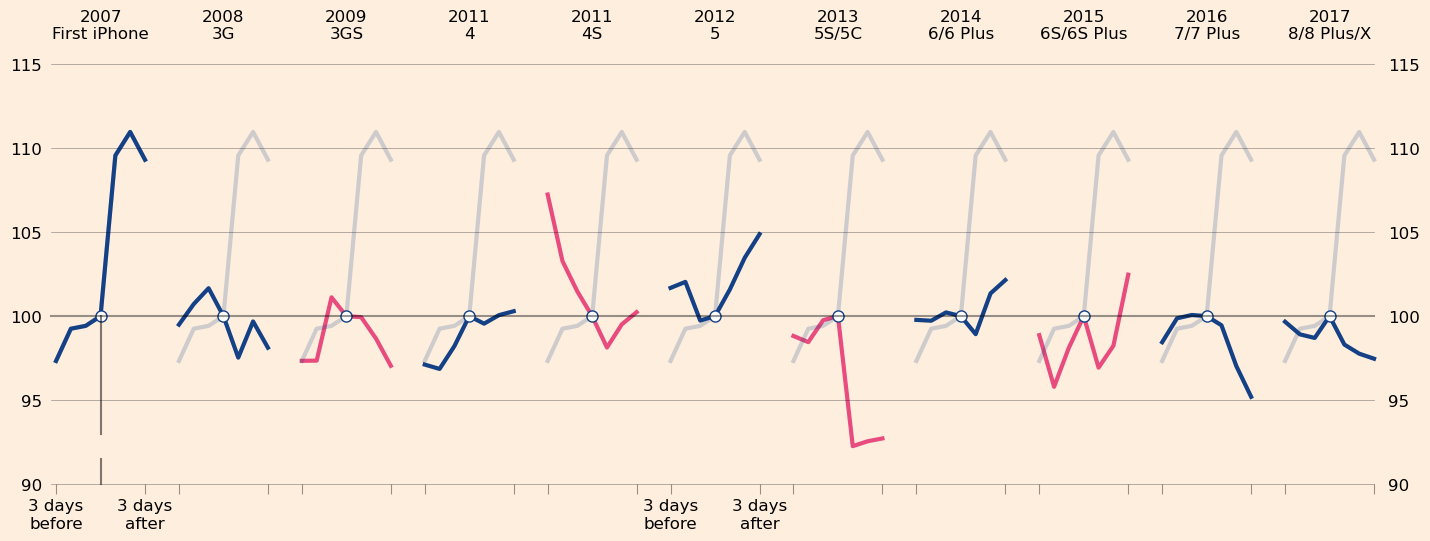

In [1146]:
for y in ([90, 91.5], [93, 100]):
    l = plt.Line2D(
        [0, 0], y,
        transform=axs[0].transData,
        color="black", alpha=0.5, linewidth=1.5, zorder=0.1
    )

    fig.lines.append(l)
fig

#### 2.5.5. Annotations

- The last step on our journey is to add annotations that mark Tim Cook’s first announcement as CEO, the lackluster market response to S model announcements, and a label showing that the white dot on each subplot is associated with the announcement date.
- Adding text to figures is always a bit verbose, so don’t get too scared by what is happening here.

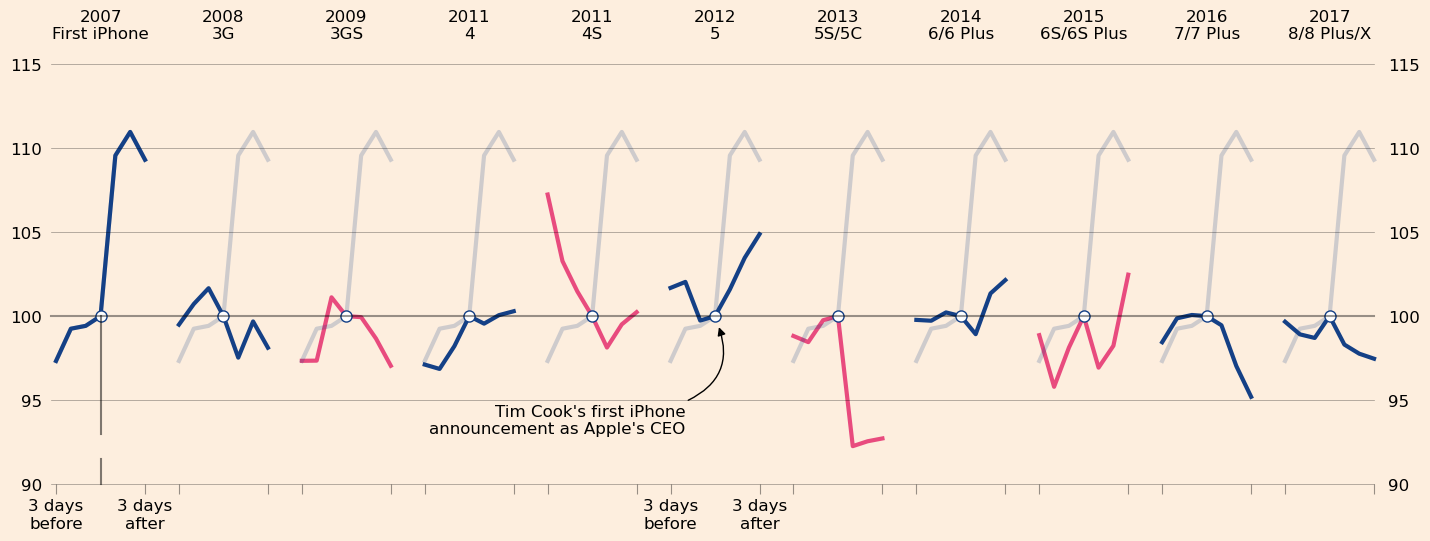

In [1147]:
axs[5].annotate(
    "Tim Cook's first iPhone\nannouncement as Apple's CEO",
    xy=(0.2, 99.5), xycoords="data", xytext=(-2, 93),
    annotation_clip=False,
    horizontalalignment="right",
    arrowprops={
        "arrowstyle": "-|>",
        "connectionstyle": "angle3,angleA=0,angleB=110",
        "color": "black"
    },
    fontsize=12,
)

fig

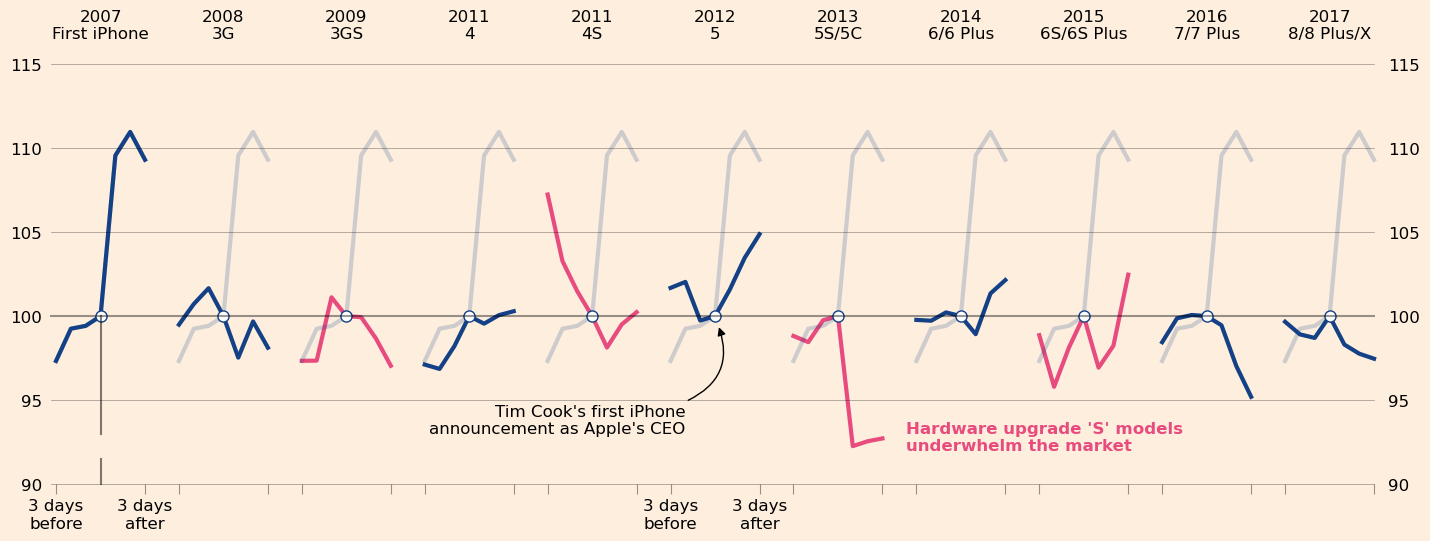

In [1148]:
for ann in axs[8].texts:
    ann.remove()

axs[8].annotate(
    "Hardware upgrade 'S' models\nunderwhelm the market",
    xy=(-5, 99.5), xycoords="data", xytext=(-12, 92),
    annotation_clip=False,
    horizontalalignment="left",
    arrowprops={"visible": False},
    fontsize=12, fontweight="semibold",
    color=pink,
)
axs[8].set_zorder(0.05)
fig

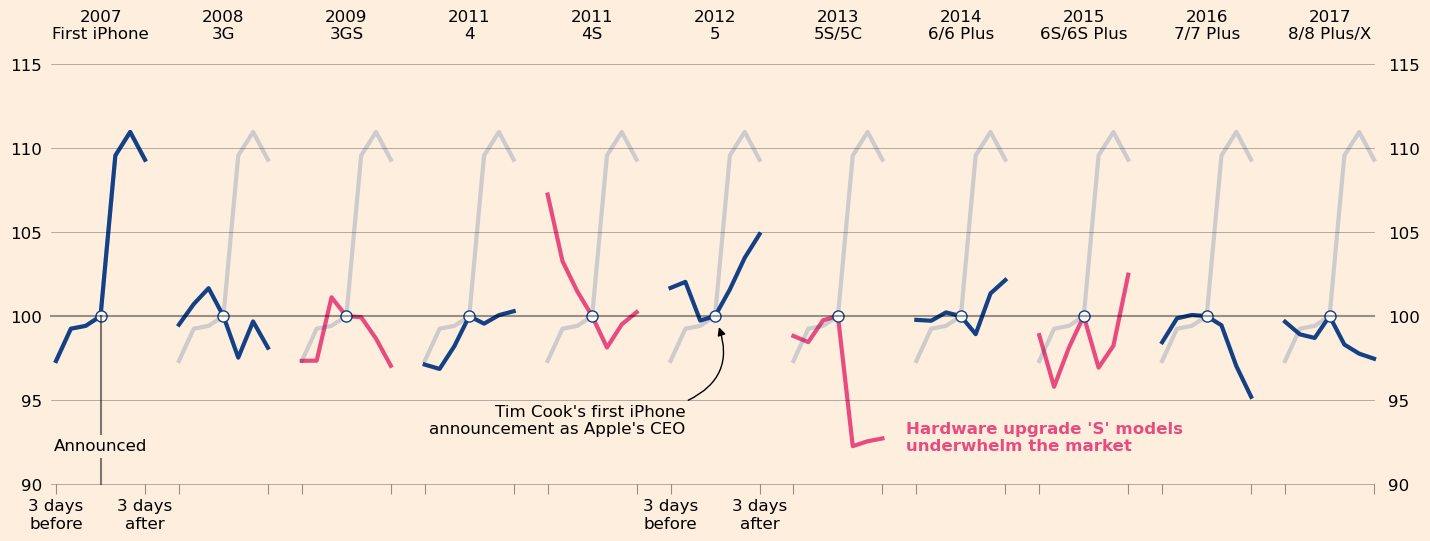

In [1149]:
axs[0].annotate(
    "Announced",
    xy=(0, 99.5), xycoords="data", xytext=(0, 92),
    annotation_clip=False,
    horizontalalignment="center",
    arrowprops={"visible": False},
    fontsize=12,
)
fig

### 2.6. Saving the Figure

- Now that we have a finished product we are happy with, let’s save it to a file on our computer using the `fig.savefig` function.

In [1150]:
fig.savefig("aapl_iPhone_annoucements.png", dpi=400, bbox_inches="tight", facecolor=background)

- Here, we asked matplotlib to save our figure in the `png` format, with 400 dots per inch (`dpi`, meaning each inch has a 400 by 400 set of colored points).
- The `bbox_inches` command is needed here to make sure pandas doesn’t chop off any of our Axes titles or tick labels.
- The `facecolor` argument was necessary because matplotlib will save figures with a transparent background by default (meaning the background is see-through so it “adopts” the background color of whatever website, document, or presentation is is placed in).
- We could have chosen a different file format.

In [1151]:
fig.savefig("aapl_iPhone_annoucements.jpeg", dpi=400, bbox_inches="tight", facecolor=background)

# dpi not needed as pdf is a "vector" format that effectively has an infinite dpi
fig.savefig("aapl_iPhone_annoucements.pdf", bbox_inches="tight", facecolor=background)

# svg is also a vector format
fig.savefig("aapl_iPhone_annoucements.svg", bbox_inches="tight", facecolor=background)

- Phew, we made it!
- We ended up writing quite a bit of code to get the figure to look exactly how we wanted it to look.
- Typically, our plotting code will be much more concise and simple because we don’t usually require the same standards for aesthetic properties as professional journalists do.

### 2.7. Rules and Guidelines

- To learn more about **visualization**, visit [here](https://datascience.quantecon.org/tools/visualization_rules.html).

## **3. Statistics**

### 3.1. Review on Probability Theory

- Due to lack of time, we won't review probability theory.
    - Some basic concepts of probability theory can be gone through by lectures below.

- Basic Probability Theory: https://intro.quantecon.org/prob_dist.html
- Probability Theory with Matrices: https://python.quantecon.org/prob_matrix.html
- The Law of Large Numbers and the Central Limit Theorem: https://python.quantecon.org/lln_clt.html
- Two Meanings of Probability: https://python.quantecon.org/prob_meaning.html

### 3.2. Linear Regression

In [1152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 3.2.1. Simple Linear Regression Model

- The simple regression model estimates the relationship between two variables $x_i$ and $y_i$

$$y_i= \alpha + \beta x_i + \epsilon_i,\ i=1,2,\cdots, N$$
- where $\epsilon_i$ represents the error between the line of best fit and the sample values for $y_i$ given $x_i$.

- Our goal is to **choose values for $\alpha$ and $\beta$** to build **a line of “best” fit for some data** that is available for variables $x_i$ and $y_i$.

- Let us consider a simple dataset of 10 observations for variables $x_i$ and $y_i$:

<center>

||$y_i$|$x_i$|
|-----|----------|----------|
|1|2000|32|
|2|1000|21|
|3|1500|24|
|4|2500|35|
|5|500|10|
|6|900|11|
|7|1100|22|
|8|1500|21|
|9|1800|27|
|10|250|2|

</center>

- Let us think about $y_i$ as sales for an ice-cream cart, while $x_i$ is a variable that records the day’s temperature in Celsius.

In [1153]:
x = [32, 21, 24, 35, 10, 11, 22, 21, 27, 2]
y = [2000,1000,1500,2500,500,900,1100,1500,1800, 250]
df = pd.DataFrame([x,y]).T
df.columns = ['X', 'Y']
df

,X,Y
0,32,2000
1,21,1000
2,24,1500
3,35,2500
4,10,500
5,11,900
6,22,1100
7,21,1500
8,27,1800
9,2,250


- We can use a scatter plot of the data to see the relationship between $y_i$(ice-cream sales in dollars (\$’s)) and $x_i$(degrees Celsius).

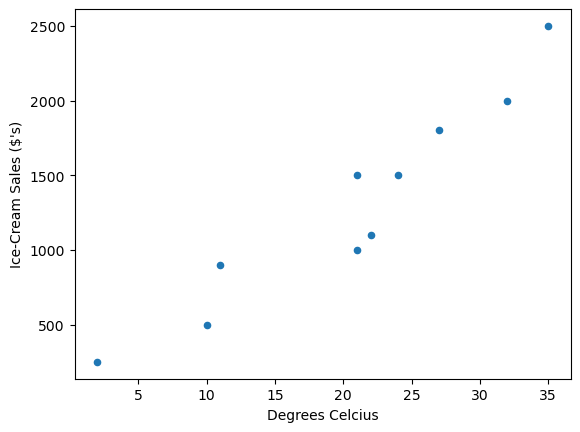

In [1154]:
ax = df.plot(
    x='X',
    y='Y',
    kind='scatter',
    ylabel='Ice-Cream Sales ($\'s)',
    xlabel='Degrees Celcius'
)

- as you can see the data suggests that more ice-cream is typically sold on hotter days.
- To build a linear model of the data we need to choose values for $\alpha$ and $\beta$ that represents a line of “best” fit such that

$$\hat{y_i} = \hat{\alpha} + \hat{\beta} x_i$$

- Let’s start with $\alpha = 5$ and $\beta = 10$


In [1155]:
α = 5
β = 10
df['Y_hat'] = α + β * df['X']

<Axes: xlabel='X', ylabel='Y'>

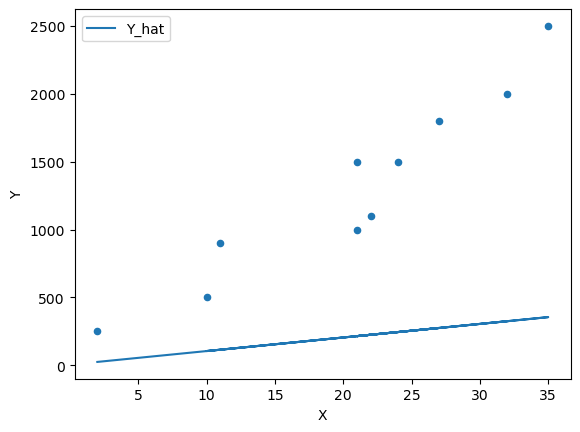

In [1156]:
fig, ax = plt.subplots()
df.plot(x='X',y='Y', kind='scatter', ax=ax)
df.plot(x='X',y='Y_hat', kind='line', ax=ax)

- We can see that this model does a **poor** job of estimating the relationship.
- We can continue to **guess and iterate** towards a line of **“best” fit** by adjusting the parameters

In [1157]:
β = 100
df['Y_hat'] = α + β * df['X']

<Axes: xlabel='X', ylabel='Y'>

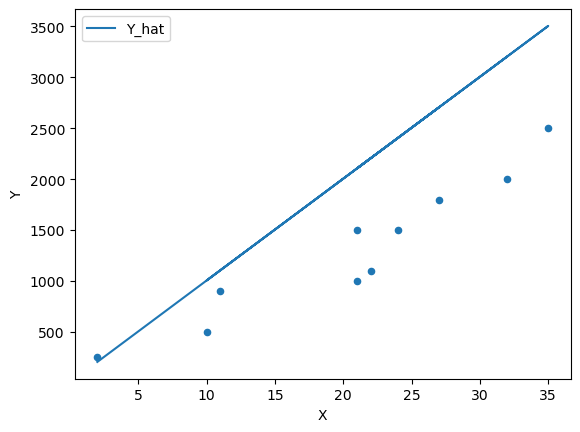

In [1158]:
fig, ax = plt.subplots()
df.plot(x='X',y='Y', kind='scatter', ax=ax)
df.plot(x='X',y='Y_hat', kind='line', ax=ax)

In [1159]:
β = 65
df['Y_hat'] = α + β * df['X']

<Axes: xlabel='X', ylabel='Y'>

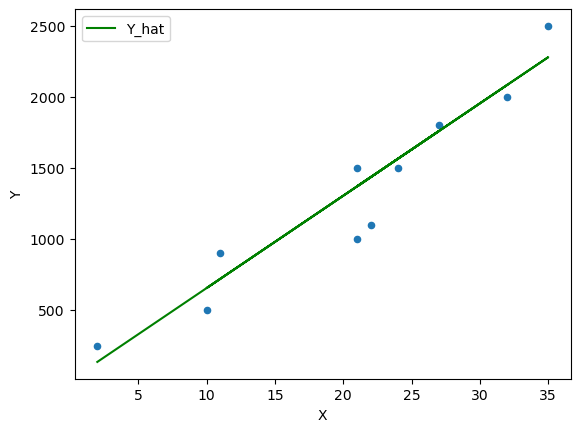

In [1160]:
fig, ax = plt.subplots()
df.plot(x='X',y='Y', kind='scatter', ax=ax)
df.plot(x='X',y='Y_hat', kind='line', ax=ax, color='g')

- However we need to think about formalising this guessing process by thinking of this problem as an optimization problem.
- Let’s consider the error $\epsilon_i$ and define the difference between the observed values $y_i$ and the estimated values $\hat{y_i}$ which we will call the residuals

$$ \begin{matrix} \hat{e_i} &=& y_i - \hat{y_i}\\ &=& y_i - \hat{\alpha} - \hat{\beta} x_i \end{matrix}$$

In [1161]:
df['error'] = df['Y_hat'] - df['Y']

In [1162]:
df

,X,Y,Y_hat,error
0,32,2000,2085,85
1,21,1000,1370,370
2,24,1500,1565,65
3,35,2500,2280,-220
4,10,500,655,155
5,11,900,720,-180
6,22,1100,1435,335
7,21,1500,1370,-130
8,27,1800,1760,-40
9,2,250,135,-115


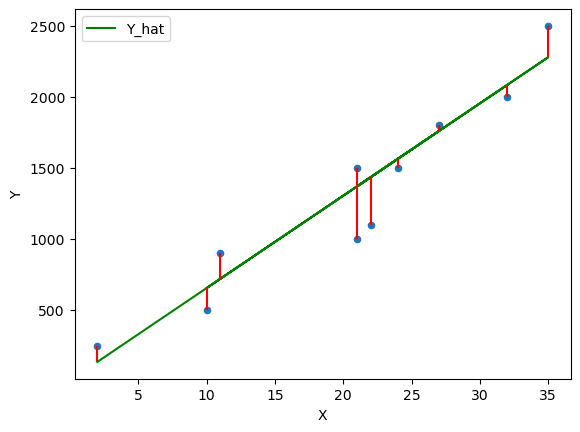

In [1163]:
fig, ax = plt.subplots()
df.plot(x='X',y='Y', kind='scatter', ax=ax)
df.plot(x='X',y='Y_hat', kind='line', ax=ax, color='g')
plt.vlines(df['X'], df['Y_hat'], df['Y'], color='r');

- The **Ordinary Least Squares (OLS)** method, as the name suggests, chooses $\alpha$ and $\beta$ in such a way that **minimises the Sum of the Squared Residuals (SSR)**.

$$\min_{\alpha,\ \beta}\sum^{N}_{i=1} \hat{e^2_i} = \min_{\alpha,\ \beta}\sum^{N}_{i=1} (y_i - \alpha - \beta x_i)^2 $$

- Let’s call this a cost function:

$$C= \sum^{N}_{i=1} (y_i - \alpha - \beta x_i)^2 $$

- that we would like to minimise with parameters $\alpha$ and $\beta$.

#### 3.2.2. How does error change with respect to $α$ and $β$

-  Let us first look at how the total error changes with respect to $\beta$ (holding the intercept $\alpha$ constant)
- We know from the next section the optimal values for $\alpha $ and $\beta $ are:

In [1164]:
β_optimal = 64.38
α_optimal = -14.72

- We can then calculate the error for a range of $\beta$ values.

In [1165]:
errors = {}
for β in np.arange(20,100,0.5):
    errors[β] = abs((α_optimal + β * df['X']) - df['Y']).sum()

- Plotting the error

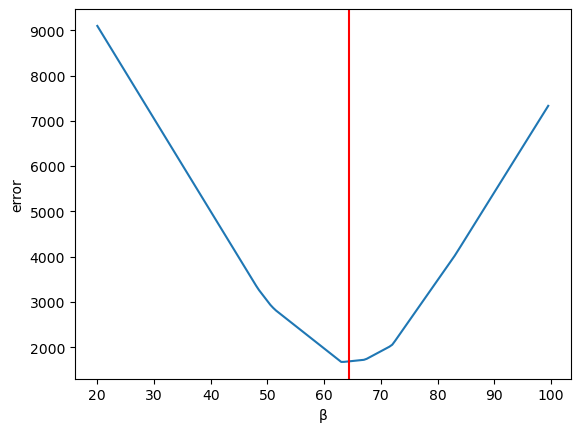

In [1166]:
ax = pd.Series(errors).plot(xlabel='β', ylabel='error')
plt.axvline(β_optimal, color='r');

- Now let us vary $\alpha $ (holding  $\beta$ constant)

In [1167]:
errors = {}
for α in np.arange(-500,500,5):
    errors[α] = abs((α + β_optimal * df['X']) - df['Y']).sum()

- Plotting the error

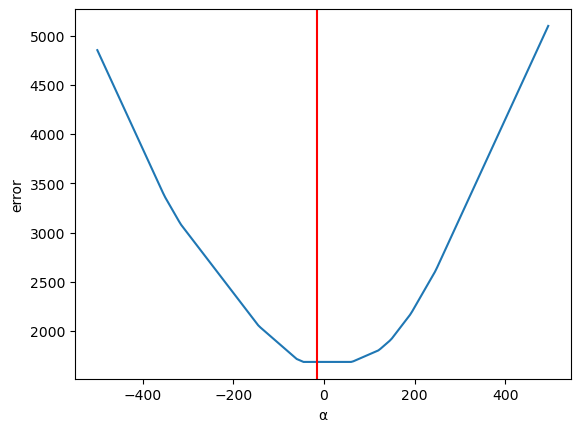

In [1168]:
ax = pd.Series(errors).plot(xlabel='α', ylabel='error')
plt.axvline(α_optimal, color='r');

#### 3.2.3. Calculating Optimal Values

- Now let us use calculus to solve the optimization problem and compute the optimal values for $\alpha$ and $\beta$ to find the ordinary least squares solution.
- First taking the partial derivative with respect to $\alpha$.



$${\partial \over \partial \alpha }[\sum^{N}_{i=1} (y_i - \alpha - \beta x_i)^2] $$

- and setting it equal to $0$.

$$0= \sum^{N}_{i=1} -2 (y_i - \alpha - \beta x_i) $$

- we can remove the constant $-2$ from the summation by dividing both sides by $-2$.


$$0= \sum^{N}_{i=1} (y_i - \alpha - \beta x_i) $$

- Now we can split this equation up into the components

$$0= \sum^{N}_{i=1} y_i - \sum^{N}_{i=1}\alpha - \beta \sum^{N}_{i=1}x_i $$

- The middle term is a straight forward sum from $i=1, 2, \cdots, N$ by a constant $\alpha$.


$$0= \sum^{N}_{i=1} y_i - N \alpha - \beta \sum^{N}_{i=1}x_i $$

- and rearranging terms

$$\alpha = \frac{\sum^{N}_{i=1} y_i - \beta \sum^{N}_{i=1}x_i}{N} $$

- We observe that both fractions resolve to the means $\bar{y_i}$ and $\bar{x_i}$


$$ \alpha = \bar{y_i} - \beta \bar{x_i} \tag{1}$$

- Now let’s take the partial derivative of the cost function $C$ with respect to $\beta$.


$${\partial \over \partial \beta }[\sum^{N}_{i=1} (y_i - \alpha - \beta x_i)^2] $$

- and setting it equal to $0$.

$$0= \sum^{N}_{i=1} -2 x_i (y_i - \alpha - \beta x_i) $$

- we can again take the constant outside of the summation and divide both sides by $-2$.

$$0= \sum^{N}_{i=1} x_i (y_i - \alpha - \beta x_i) $$

- which becomes

$$0= \sum^{N}_{i=1} (x_i y_i - \alpha x_i - \beta x_i^2) $$

- now substituting for $\alpha$,

$$0= \sum^{N}_{i=1} (x_i y_i - ( \bar{y_i} - \beta \bar{x_i} ) x_i - \beta x_i^2) $$

- and rearranging terms

$$0= \sum^{N}_{i=1} (x_i y_i - \bar{y_i} x_i + \beta \bar{x_i} x_i - \beta x_i^2) $$

- This can be split into two summations

$$0= \sum^{N}_{i=1} (x_i y_i - \bar{y_i} x_i) + \beta \sum^{N}_{i=1} (\bar{x_i} x_i - x_i^2) $$

- and solving for $\beta$ yields

$$\beta = \frac{\sum^{N}_{i=1} (x_i y_i - \bar{y_i} x_i)}{\sum^{N}_{i=1} (x_i^2 - \bar{x_i} x_i)} \tag{2}$$

- We can now use (1) and (2) to calculate the optimal values for $\alpha$ and $\beta$
- Calculating $\beta$

In [1169]:
df = df[['X','Y']].copy()  # Original Data

# Calculate the sample means
x_bar = df['X'].mean()
y_bar = df['Y'].mean()

- Now computing across the 10 observations and then summing the numerator and denominator

In [1170]:
# Compute the Sums
df['num'] = df['X'] * df['Y'] - y_bar * df['X']
df['den'] = pow(df['X'],2) - x_bar * df['X']
β = df['num'].sum() / df['den'].sum()
print(β)

64.37665782493369


- Calculating $\alpha$

In [1171]:
α = y_bar - β * x_bar
print(α)

-14.72148541114052


- Now we can plot the OLS solution

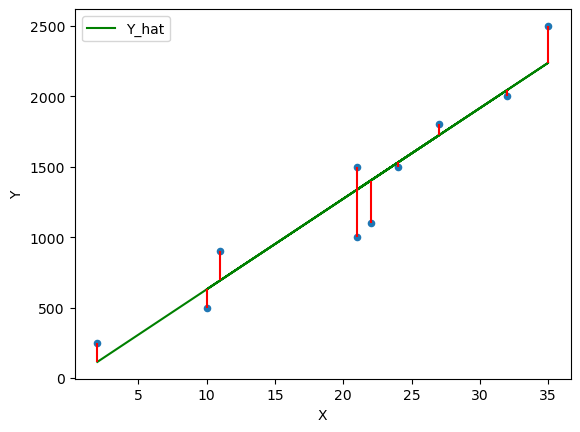

In [1172]:
df['Y_hat'] = α + β * df['X']
df['error'] = df['Y_hat'] - df['Y']

fig, ax = plt.subplots()
df.plot(x='X',y='Y', kind='scatter', ax=ax)
df.plot(x='X',y='Y_hat', kind='line', ax=ax, color='g')
plt.vlines(df['X'], df['Y_hat'], df['Y'], color='r');

**[Exercise]**
- Discuss mathematical properties for why we have chosen OLS

**[Exercise]**
- Now that you know the equations that solve the simple linear regression model using OLS you can now run your own regressions to build a model between $y$ and $x$.
- Let’s consider two economic variables **GDP per capita** and **Life Expectancy**.
    1. What do you think their relationship would be?
    2. Gather some data from [our world in data](https://ourworldindata.org/)
    3. Use pandas to import the csv formatted data and plot a few different countries of interest
    4. Use (1) and (2) to compute optimal values for $\alpha$ and $\beta$
    5. Plot the line of best fit found using OLS
    6. Interpret the coefficients and write a summary sentence of the relationship between GDP per capita and Life Expectancy

## **4. Risk and Uncertainty**

- Understanding **the concepts of utility under risk and uncertainty** is important to fully understand further readings and assignments.
- Please refer to the **Supplementary section** at the notion of Junior Studies.